# **Proyecto 1 - Data Engineering - Limpieza y preprocesado - MÁSTER EN DATA SCIENCE & AI : NUCLIO**


In [286]:
# importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from scipy.stats import mode

In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
df = pd.read_csv('/content/drive/MyDrive/MASTER/TFM/Entregable 1/bmw_pricing_v3.csv')
df

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [289]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Columns: 18 entries, marca to fecha_venta
dtypes: bool(1), float64(3), object(14)
memory usage: 648.1+ KB


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [291]:
# cambiar formato de las columnas 'fecha_registro' y 'fecha_venta' a Datetime
for i in ["fecha_registro","fecha_venta"]:
    df[i] = pd.to_datetime(df[i])

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [293]:
df.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [294]:
# Porcentaje de nulos por variable
df.isnull().mean() * 100


marca                          20.028908
modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

Se eliminan los nulos de las variables en donde la cantidad es inferior al 1%.

In [295]:
df.dropna(subset=["modelo",'km','potencia','tipo_gasolina','volante_regulable','camara_trasera','elevalunas_electrico','precio', 'fecha_venta'], inplace=True)
df.isnull().any()

marca                           True
modelo                         False
km                             False
potencia                       False
fecha_registro                  True
tipo_gasolina                  False
color                           True
tipo_coche                      True
volante_regulable              False
aire_acondicionado              True
camara_trasera                 False
asientos_traseros_plegables     True
elevalunas_electrico           False
bluetooth                       True
gps                            False
alerta_lim_velocidad            True
precio                         False
fecha_venta                    False
dtype: bool

## **Tratamiento univariable - MARCA**

Identificamos, en primer lugar, si el df solo contiene información de la marca BMW, o si también hay de las otras que conforman el grupo (Rolls Royce y Mini).

In [296]:
df['marca'].value_counts()

marca
BMW    3852
Name: count, dtype: int64

Únicamente hay datos de BMW, por lo que esta variable no aporta ningún valor al df.

In [297]:
del(df['marca'])
df.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


## **Tratamiento univariable - KM**

In [298]:
df['km'] = df['km'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4817 non-null   object        
 1   km                           4817 non-null   int64         
 2   potencia                     4817 non-null   float64       
 3   fecha_registro               2408 non-null   datetime64[ns]
 4   tipo_gasolina                4817 non-null   object        
 5   color                        4375 non-null   object        
 6   tipo_coche                   3368 non-null   object        
 7   volante_regulable            4817 non-null   object        
 8   aire_acondicionado           4335 non-null   object        
 9   camara_trasera               4817 non-null   object        
 10  asientos_traseros_plegables  1444 non-null   object        
 11  elevalunas_electrico         4817 non-null   obj

<Axes: xlabel='km'>

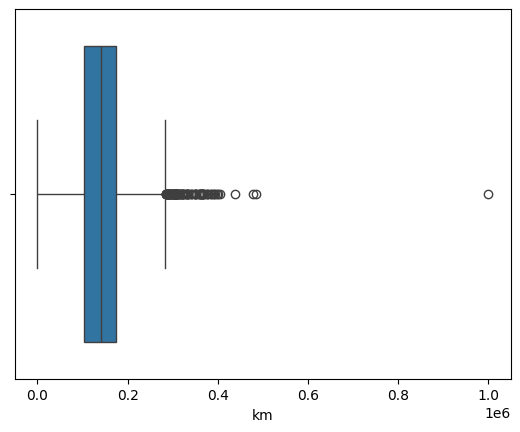

In [299]:
sns.boxplot(x=df["km"])

In [300]:
# Outliers
df[df['km']>600000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3732,118,1000376,90.0,2005-03-01,diesel,NaN,NaN,True,False,False,False,False,NaN,True,False,1400.0,2018-06-01


Hemos decidido no eliminar el posible outliers ya que tiene sentido que el coche tenga un millón de kilometros por la fecha de registro.

## **Tratamiento univariable - POTENCIA**

In [301]:
df['potencia'] = df['potencia'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4817 non-null   object        
 1   km                           4817 non-null   int64         
 2   potencia                     4817 non-null   int64         
 3   fecha_registro               2408 non-null   datetime64[ns]
 4   tipo_gasolina                4817 non-null   object        
 5   color                        4375 non-null   object        
 6   tipo_coche                   3368 non-null   object        
 7   volante_regulable            4817 non-null   object        
 8   aire_acondicionado           4335 non-null   object        
 9   camara_trasera               4817 non-null   object        
 10  asientos_traseros_plegables  1444 non-null   object        
 11  elevalunas_electrico         4817 non-null   obj

<Axes: xlabel='potencia'>

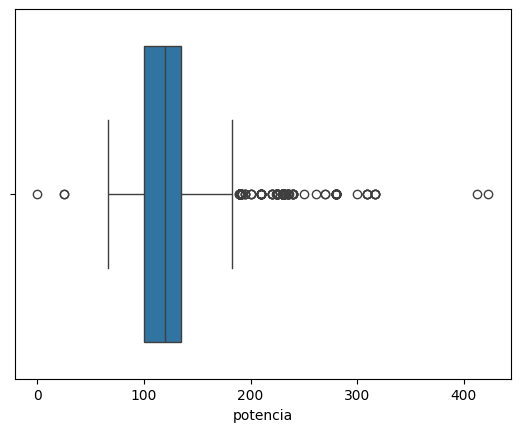

In [302]:
sns.boxplot(x=df["potencia"])

In [303]:
df[df['potencia']<50]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,i3,152328,25,NaT,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1925,i3,152470,25,NaT,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01
3765,X1,81770,0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,NaN,11700.0,2018-03-01


In [304]:
df[df['modelo']=='i3']

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,i3,152328,25,NaT,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1895,i3,26542,75,2014-03-01,electro,grey,NaN,False,NaN,False,NaN,False,NaN,True,True,20900.0,2018-02-01
1925,i3,152470,25,NaT,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01
2317,i3,78740,75,NaT,electro,grey,hatchback,True,True,False,False,False,NaN,True,False,20800.0,2018-07-01
2363,i3,46359,125,2014-01-01,electro,white,hatchback,True,True,False,NaN,False,NaN,True,True,21200.0,2018-08-01
3690,i3,6572,75,2015-11-01,hybrid_petrol,black,NaN,True,True,True,False,False,False,True,NaN,28000.0,2018-03-01


Eliminaremos aquellos registros donde la potencia es inferior a 50, ya que los consideramos outliers porque no tienen sentido al compararlos con datos reales.
Del BMW i3 no existen modelos con tan poca potencia (kw).


In [305]:
df.drop(df[df['potencia']<50].index, inplace=True)
df[df['potencia']<50]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


## **Tratamiento univariable -- FECHA REGISTRO**

In [306]:
df['dif_fecha_registro_venta'] = df['fecha_venta'] - df['fecha_registro']
df['dif_fecha_registro_venta']

0      2161 days
1            NaT
2      2132 days
3            NaT
4            NaT
          ...   
4838         NaT
4839   1157 days
4840   1066 days
4841    883 days
4842         NaT
Name: dif_fecha_registro_venta, Length: 4814, dtype: timedelta64[ns]

Hemos decidido sustituir la fecha de registro por la diferencia entre esta y la fecha de venta ya que nos proporciona la misma información y podemos trabajar desde una sola variable numérica.

<Axes: xlabel='dif_fecha_registro_venta', ylabel='precio'>

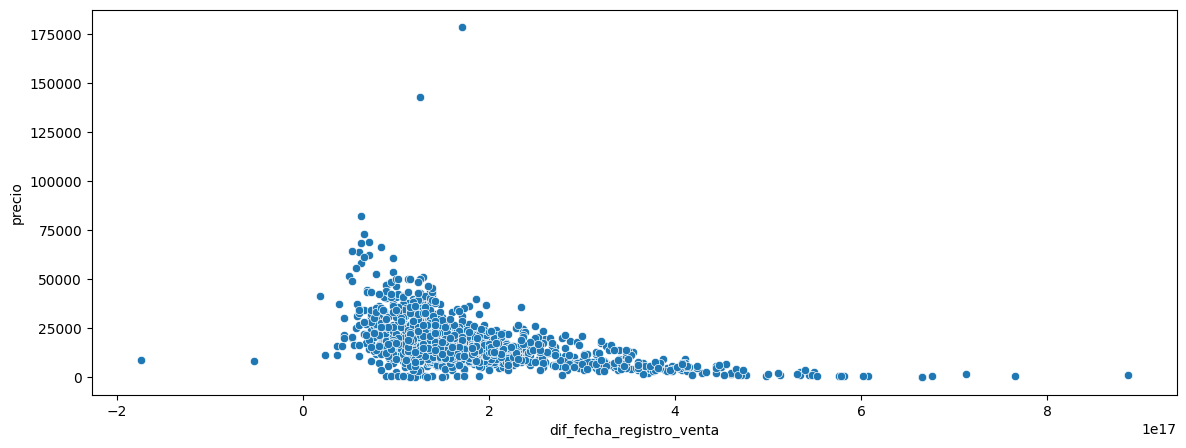

In [307]:
plt.figure(figsize=(14,5))
sns.scatterplot(x="dif_fecha_registro_venta", y="precio", data=df)

Podemos observar una relación notable con el target, el precio disminuye cuando la diferencia entre las fechas aumenta.

In [308]:
df['dif_fecha_registro_venta'] = df['dif_fecha_registro_venta'].dt.days


In [309]:
df[df['dif_fecha_registro_venta']<0]


,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,dif_fecha_registro_venta
100,320,342768,135,2011-12-01,diesel,black,NaN,False,True,False,NaN,True,False,True,NaN,8200.0,2010-04-01,-609.0
256,316,201102,85,2013-12-01,diesel,black,estate,True,NaN,False,NaN,False,False,True,False,8800.0,2008-06-01,-2009.0


In [310]:
df[df['dif_fecha_registro_venta']>7000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,dif_fecha_registro_venta
25,318,196092,85,1995-10-01,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01,8248.0
2473,525,230578,85,1997-07-01,diesel,NaN,sedan,False,NaN,False,False,False,False,True,NaN,200.0,2018-08-01,7701.0
2574,525,229880,85,1997-07-01,diesel,black,sedan,False,NaN,False,False,False,NaN,True,False,200.0,2018-08-01,7701.0
2611,525,230264,85,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01,7701.0
2771,316,146951,66,1990-03-01,petrol,white,sedan,False,False,False,NaN,False,False,False,False,1300.0,2018-04-01,10258.0
3062,318,98097,85,1994-01-01,petrol,blue,sedan,True,False,False,False,False,False,True,True,400.0,2018-04-01,8856.0
3380,525,245302,105,1997-01-01,diesel,green,NaN,False,True,False,NaN,False,False,True,True,900.0,2018-06-01,7821.0
3387,525,266641,85,1999-03-01,diesel,black,sedan,True,False,False,False,False,False,True,False,800.0,2018-06-01,7032.0


Consideramos que son valores posibles y no es necesario eliminarlos. Ya que el mayor outlier de 10000 días (28 años, 1990) es un coche que puede venderse a día de hoy.

In [311]:
# Eliminacion de outliers
df.drop(df[(df['dif_fecha_registro_venta']<0)].index, inplace=True)

In [312]:
df['dif_fecha_registro_venta'] = df["dif_fecha_registro_venta"].fillna(-1.0)
df['dif_fecha_registro_venta']


0       2161.0
1         -1.0
2       2132.0
3         -1.0
4         -1.0
         ...  
4838      -1.0
4839    1157.0
4840    1066.0
4841     883.0
4842      -1.0
Name: dif_fecha_registro_venta, Length: 4812, dtype: float64

Para el tratamiento de nulos hemos optado por utilizar un valor fuera de rango (-1) debido a que un 50% de los valores son nulos. De esta forma el modelo les dará a los valores fuera de rango menos importancia.

In [313]:
df['dif_fecha_registro_venta'] = df["dif_fecha_registro_venta"].astype(int)
df['dif_fecha_registro_venta']


0       2161
1         -1
2       2132
3         -1
4         -1
        ... 
4838      -1
4839    1157
4840    1066
4841     883
4842      -1
Name: dif_fecha_registro_venta, Length: 4812, dtype: int64

<Axes: xlabel='dif_fecha_registro_venta', ylabel='precio'>

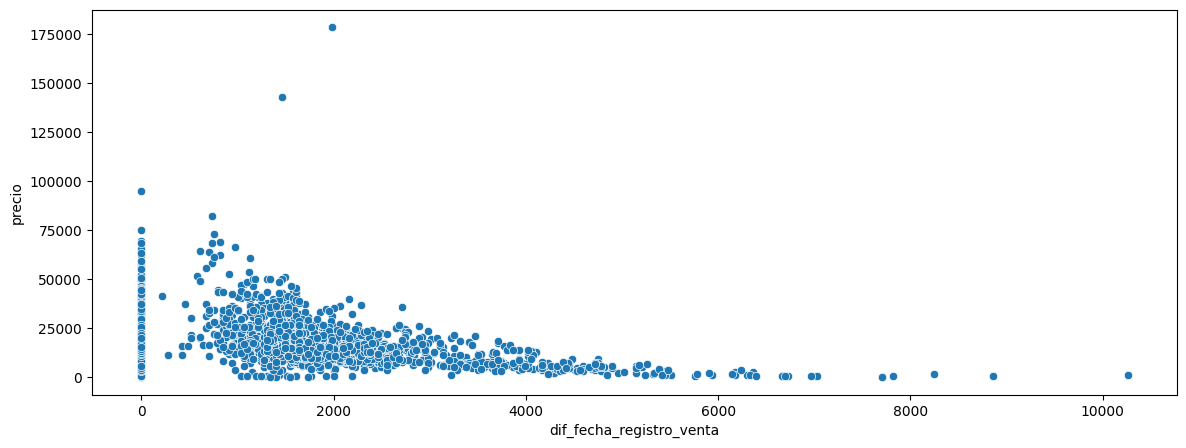

In [314]:
plt.figure(figsize=(14,5))
sns.scatterplot(x="dif_fecha_registro_venta", y="precio", data=df)


In [315]:
# Eliminacion de la variable fecha_registro
del(df['fecha_registro'])
df.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                           442
tipo_coche                     1447
volante_regulable                 0
aire_acondicionado              481
camara_trasera                    0
asientos_traseros_plegables    3369
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            722
precio                            0
fecha_venta                       0
dif_fecha_registro_venta          0
dtype: int64

## **Tratamiento univariable -- TIPO GASOLINA**

In [316]:
df['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4607
petrol            191
hybrid_petrol       6
Diesel              5
electro             3
Name: count, dtype: int64

In [317]:
# Unificar valor 'diesel' y 'Diesel'
df['tipo_gasolina']= np.where(df['tipo_gasolina'] == 'Diesel', 'diesel', df['tipo_gasolina'])
df['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4612
petrol            191
hybrid_petrol       6
electro             3
Name: count, dtype: int64

Electro y hybrid_petrol son valores muy diferentes al patrón del diesel y gasolina (petrol) y encima los hybrid_petrol y electro son muy pocos casos (0,2%) con lo que pueden generar ruido al modelo ya que tienen una distribución muy diferente frente al target(precio). Como son tan diferentes podemos considerarlos outliers y eliminarlos. Hay que tener en cuenta que 11 filas no son suficientes para predecir un precio de un eléctrico o híbrido y generarán memorización en el modelo.

In [318]:
df.drop(df[(df['tipo_gasolina'] == 'hybrid_petrol')].index, inplace=True)
df.drop(df[(df['tipo_gasolina'] == 'electro')].index, inplace=True)

In [319]:
df['tipo_gasolina'].value_counts()

tipo_gasolina
diesel    4612
petrol     191
Name: count, dtype: int64

## **Tratamiento univariable -- COLOR**

In [320]:
df['color']

0        black
1         grey
2        white
3          red
4       silver
         ...  
4838     black
4839      grey
4840      grey
4841     brown
4842      grey
Name: color, Length: 4803, dtype: object

In [321]:
df['color'].fillna('Desconocido', inplace=True)
df[df['color'] == 'Desconocido']

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,dif_fecha_registro_venta
14,120,174631,120,diesel,Desconocido,convertible,True,True,False,False,False,False,True,False,10500.0,2018-04-01,3377
18,325,205474,145,diesel,Desconocido,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01,3257
25,318,196092,85,petrol,Desconocido,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01,8248
36,318,187294,105,petrol,Desconocido,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01,-1
47,420,20996,135,petrol,Desconocido,coupe,True,False,False,NaN,True,False,True,False,21400.0,2018-04-01,1431
49,118,147180,100,diesel,Desconocido,coupe,True,NaN,True,NaN,False,False,True,NaN,8400.0,2018-07-01,2252
64,420,61300,135,diesel,Desconocido,NaN,True,True,False,NaN,True,False,True,True,27700.0,2018-02-01,-1
81,420,64386,135,diesel,Desconocido,coupe,False,False,False,NaN,True,True,True,NaN,23800.0,2018-03-01,1430
88,420,125965,135,diesel,Desconocido,coupe,False,True,False,NaN,True,True,True,False,23400.0,2018-04-01,-1
92,420,96260,135,diesel,Desconocido,NaN,False,True,False,NaN,True,True,True,False,25300.0,2018-04-01,1520


<Axes: xlabel='color', ylabel='precio'>

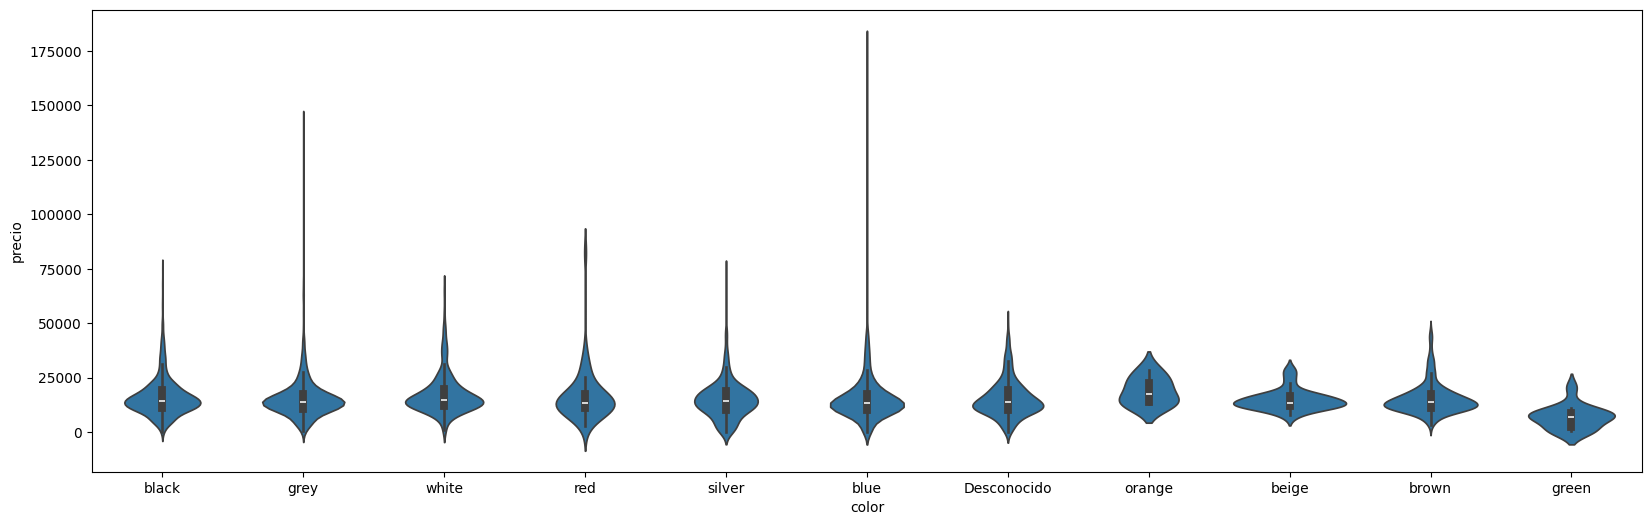

In [322]:
plt.figure(figsize=(20, 6))
sns.violinplot(x="color", y="precio", data=df) # Violinplot


Nulos sustituidos por el valor ‘Desconocido’ debido a que el color del coche presenta diferentes comportamientos para el target.

## **Tratamiento univariable -- TIPO COCHE**

El tipo de coche es una variable que nos puede aportar mucho valor, por lo que no podemos aplicar el mismo tratamiento que al color. En este sentido, con casi el 30% de nulos, no podemos borrarlos. Así, procederemos a extraer la moda de cada modelo y será el valor que le demos a la variable 'tipo_coche'.

In [323]:
def obtener_moda(series):
    moda = series.mode()
    # Caso en el que toda la serie sea nula
    if moda.empty:
        return None
    else:
        return moda.iloc[0]

In [324]:
modas = df.groupby('modelo')['tipo_coche'].apply(obtener_moda).reset_index()
modas.columns = ['modelo', 'moda_tipo_coche']

df = pd.merge(df, modas, on='modelo', how='left')

df['tipo_coche'].fillna(df['moda_tipo_coche'], inplace=True)

df.drop(columns=['moda_tipo_coche'], inplace=True)

df

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,dif_fecha_registro_venta
0,118,140411,100,diesel,black,hatchback,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,2161
1,M4,13929,317,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,-1
2,320,183297,120,diesel,white,estate,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,2132
3,420,128035,135,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,-1
4,425,97097,160,diesel,silver,coupe,True,True,False,False,False,True,True,True,33400.0,2018-04-01,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,218 Gran Tourer,39743,110,diesel,black,van,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01,-1
4799,218 Active Tourer,49832,100,diesel,grey,van,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01,1157
4800,218 Gran Tourer,19633,110,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01,1066
4801,218 Active Tourer,27920,110,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01,883


In [325]:
df.isnull().any()

modelo                         False
km                             False
potencia                       False
tipo_gasolina                  False
color                          False
tipo_coche                     False
volante_regulable              False
aire_acondicionado              True
camara_trasera                 False
asientos_traseros_plegables     True
elevalunas_electrico           False
bluetooth                       True
gps                            False
alerta_lim_velocidad            True
precio                         False
fecha_venta                    False
dif_fecha_registro_venta       False
dtype: bool

In [326]:
df = df.rename(columns={"tipo_gasolina":"diesel"})
df['diesel'] = df['diesel'].replace({'diesel': 1, 'petrol': 0})

Al tener 2 valores renombramos la columna para convertir la variable a tipo booleano.

## **Tratamiento univariable -- AIRE ACONDICIONADO**

In [327]:
df_ac = df.copy()

In [328]:
df_ac['aire_acondicionado'] = df_ac['aire_acondicionado'].fillna('Desconocido')

<Axes: xlabel='aire_acondicionado', ylabel='precio'>

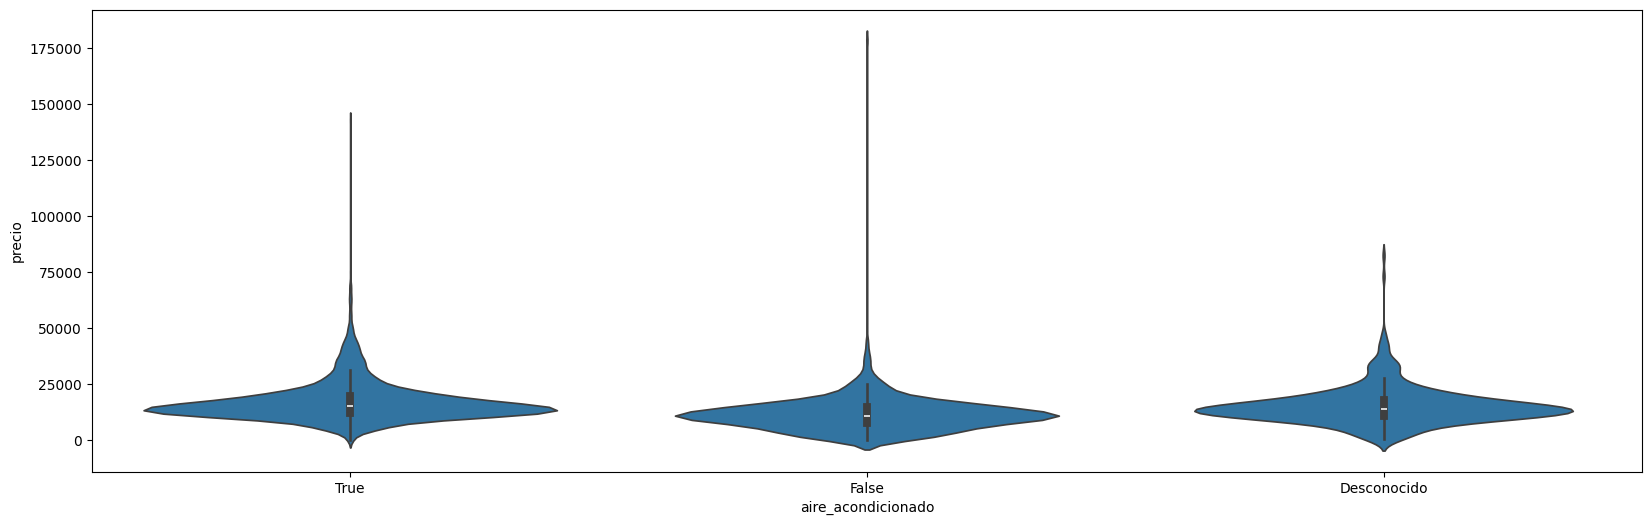

In [329]:
plt.figure(figsize=(20, 6))
sns.violinplot(x="aire_acondicionado", y="precio", data=df_ac)

In [330]:
df_ac.pivot_table(index = 'aire_acondicionado', values = 'precio', aggfunc = [len, sum, np.mean]).sort_values(by = [('mean','precio')] , ascending = True)

,len,sum,mean
,precio,precio,precio
aire_acondicionado,,,
False,884,10132400.0,11461.990950
Desconocido,480,7294600.0,15197.083333
True,3439,58490900.0,17008.112823


Al tener más de un 10% de valores nulos hemos decidido sustituirlos por un valor fuera de rango.   
En este caso al ser una variable booleana el valor podría ser -1 o 2.  
Hemos optado por 2 debido a que los valores nulos tienen una media del precio más cercana a True (1). Esto ayudará en modelos como decision tree.

In [331]:
df['aire_acondicionado'].fillna(2, inplace=True)
df['aire_acondicionado'].value_counts()

aire_acondicionado
True     3439
False     884
2         480
Name: count, dtype: int64

In [332]:
df['aire_acondicionado'] = df['aire_acondicionado'].replace({True: 1, False: 0})
df['aire_acondicionado'].dtype.kind

'i'

In [333]:
df.isnull().any()

modelo                         False
km                             False
potencia                       False
diesel                         False
color                          False
tipo_coche                     False
volante_regulable              False
aire_acondicionado             False
camara_trasera                 False
asientos_traseros_plegables     True
elevalunas_electrico           False
bluetooth                       True
gps                            False
alerta_lim_velocidad            True
precio                         False
fecha_venta                    False
dif_fecha_registro_venta       False
dtype: bool

## **Tratamiento univariable -- ASIENTOS PLEGABLES**

In [334]:
df['asientos_traseros_plegables'].value_counts()

asientos_traseros_plegables
False    1137
True      300
Name: count, dtype: int64

In [335]:
df_ap = df.copy()
df_ap.isnull().sum()

modelo                            0
km                                0
potencia                          0
diesel                            0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables    3366
elevalunas_electrico              0
bluetooth                       722
gps                               0
alerta_lim_velocidad            721
precio                            0
fecha_venta                       0
dif_fecha_registro_venta          0
dtype: int64

Sustituimos los valores nulos por la moda de cada modelo al igual que en tipo_coche.

In [336]:
modas = df_ap.groupby('modelo')['asientos_traseros_plegables'].apply(obtener_moda).reset_index()
modas.columns = ['modelo', 'moda_ap']

df_ap = pd.merge(df_ap, modas, on='modelo', how='left')

df_ap['asientos_traseros_plegables'].fillna(df_ap['moda_ap'], inplace=True)

del(df_ap['moda_ap'])

df_ap.isnull().sum()

modelo                           0
km                               0
potencia                         0
diesel                           0
color                            0
tipo_coche                       0
volante_regulable                0
aire_acondicionado               0
camara_trasera                   0
asientos_traseros_plegables     17
elevalunas_electrico             0
bluetooth                      722
gps                              0
alerta_lim_velocidad           721
precio                           0
fecha_venta                      0
dif_fecha_registro_venta         0
dtype: int64

Sustituimos los valores nulos que no tienen moda por modelo por la moda genérica del dataset.

In [337]:
moda = df_ap['asientos_traseros_plegables'].mode()[0]

In [338]:
df_ap['asientos_traseros_plegables'].fillna(moda, inplace=True)
df_ap.isnull().sum()

modelo                           0
km                               0
potencia                         0
diesel                           0
color                            0
tipo_coche                       0
volante_regulable                0
aire_acondicionado               0
camara_trasera                   0
asientos_traseros_plegables      0
elevalunas_electrico             0
bluetooth                      722
gps                              0
alerta_lim_velocidad           721
precio                           0
fecha_venta                      0
dif_fecha_registro_venta         0
dtype: int64

In [339]:
df = df_ap

In [340]:
df['asientos_traseros_plegables'] = df['asientos_traseros_plegables'].astype(int)

## **Tratamiento univariable -- BLUETOOTH**

In [341]:
df.isnull().sum()

modelo                           0
km                               0
potencia                         0
diesel                           0
color                            0
tipo_coche                       0
volante_regulable                0
aire_acondicionado               0
camara_trasera                   0
asientos_traseros_plegables      0
elevalunas_electrico             0
bluetooth                      722
gps                              0
alerta_lim_velocidad           721
precio                           0
fecha_venta                      0
dif_fecha_registro_venta         0
dtype: int64

In [342]:
df_b = df.copy()

Al igual que en el caso anterior sustituimos los valores nulos por la moda de cada modelo.

In [343]:
modas = df_b.groupby('modelo')['bluetooth'].apply(obtener_moda).reset_index()
modas.columns = ['modelo', 'moda_bl']

df_b = pd.merge(df_b, modas, on='modelo', how='left')

df_b['bluetooth'].fillna(df_b['moda_bl'], inplace=True)

df_b.drop(columns=['moda_bl'], inplace=True)

df_b.isnull().sum()

modelo                           0
km                               0
potencia                         0
diesel                           0
color                            0
tipo_coche                       0
volante_regulable                0
aire_acondicionado               0
camara_trasera                   0
asientos_traseros_plegables      0
elevalunas_electrico             0
bluetooth                        1
gps                              0
alerta_lim_velocidad           721
precio                           0
fecha_venta                      0
dif_fecha_registro_venta         0
dtype: int64

Sustituimos los valores nulos que no tienen moda por modelo por la moda genérica del dataset.

In [344]:
df_b['bluetooth'].fillna(df_b['bluetooth'].mode()[0], inplace=True)
df_b.isnull().sum()

modelo                           0
km                               0
potencia                         0
diesel                           0
color                            0
tipo_coche                       0
volante_regulable                0
aire_acondicionado               0
camara_trasera                   0
asientos_traseros_plegables      0
elevalunas_electrico             0
bluetooth                        0
gps                              0
alerta_lim_velocidad           721
precio                           0
fecha_venta                      0
dif_fecha_registro_venta         0
dtype: int64

In [345]:
df = df_b

In [346]:
df['bluetooth'] = df['bluetooth'].astype(int)

## **Tratamiento variable - ALERTA LÍMITE VELOCIDAD**

In [347]:
df_alv = df.copy()
df_alv['alerta_lim_velocidad'] = df_alv['alerta_lim_velocidad'].fillna('Desconocido')

<Axes: xlabel='alerta_lim_velocidad', ylabel='precio'>

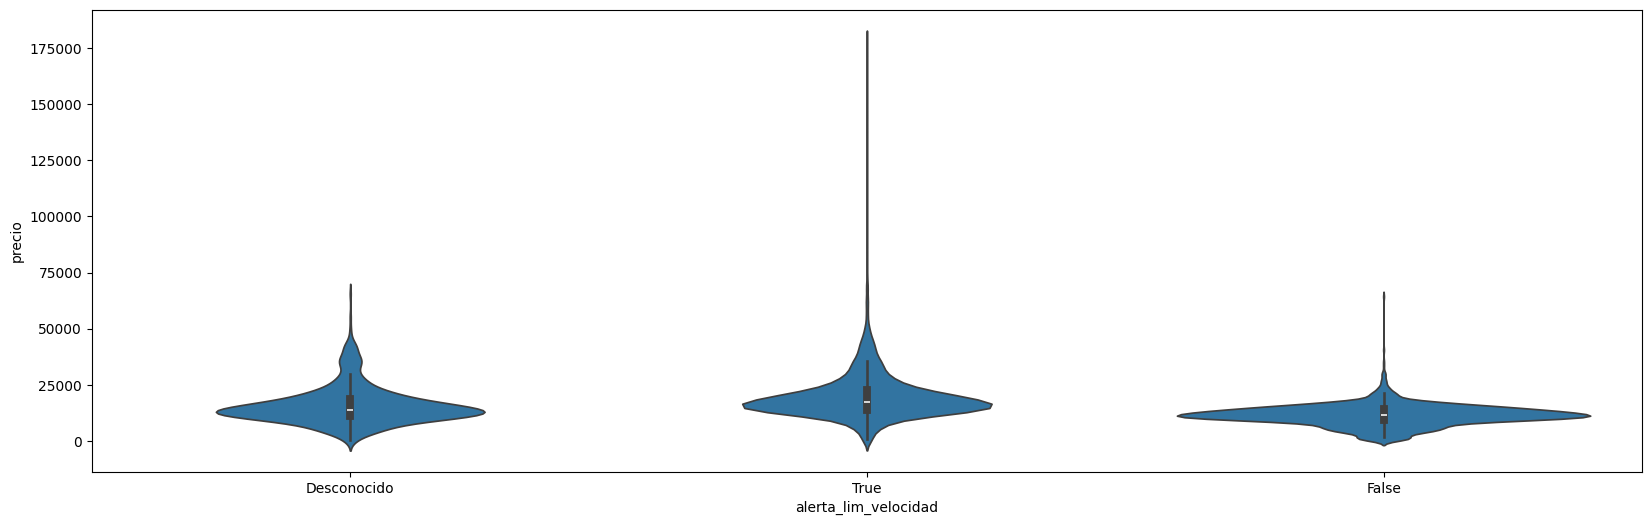

In [348]:
plt.figure(figsize=(20, 6))
sns.violinplot(x="alerta_lim_velocidad", y="precio", data=df_alv)

In [349]:
df_alv.pivot_table(index = 'alerta_lim_velocidad', values = 'precio', aggfunc = [len, sum, np.mean]).sort_values(by = [('mean','precio')] , ascending = True)

,len,sum,mean
,precio,precio,precio
alerta_lim_velocidad,,,
False,1864,21197200.0,11371.888412
Desconocido,721,11287200.0,15654.923717
True,2218,43433500.0,19582.281335


Al ser una variable relevante para el target hemos decidido sustituir los nulos por un valor fuera de rango. En este caso al ser una variable booleana el valor es 2 debido a que la media del precio se acerca más a los valores True (1). Esto ayudará en modelos como decision tree.

In [350]:
df['alerta_lim_velocidad'].fillna(2, inplace=True)
df['alerta_lim_velocidad'] = df['alerta_lim_velocidad'].replace({True: 1, False: 0})
df.isnull().sum()

modelo                         0
km                             0
potencia                       0
diesel                         0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dif_fecha_registro_venta       0
dtype: int64

## **Tratamiento univariable -- MODELO**

El caso del modelo al tener 73 categorías diferentes y muy pocos valores en cada una de ellas podría generar memorización en el modelo. Por tanto, hemos decidido agrupar las categorías por gamas.

In [351]:
df['modelo'].value_counts()

modelo
320                  746
520                  630
318                  562
X3                   437
116                  358
X1                   273
316                  232
X5                   229
525                  182
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    43
420                   42
120                   36
730                   33
420 Gran Coupé        33
330                   33
520 Gran Turismo      23
325                   19
640 Gran Coupé        19
740                   18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
218                   12
M550                  12
218 Gran Tourer        9
X6 M                   8
418 Gran Coupé         8
640                    7
335                    7
M3                     7
528                    6
Z4                

In [352]:
modelo_a_familia = {
    '114': '1 Series', '116': '1 Series', '118': '1 Series', '120': '1 Series', '123': '1 Series', '125': '1 Series', '135': '1 Series',
    '214': '2 Series', '216': '2 Series', '218': '2 Series', '220': '2 Series', '225': '2 Series', '228': '2 Series', '230': '2 Series',
    '316': '3 Series', '318': '3 Series', '320': '3 Series', '323': '3 Series', '325': '3 Series', '328': '3 Series', '330': '3 Series', '335': '3 Series', '340': '3 Series',
    '320 Gran Turismo': '3 Series', '325 Gran Turismo': '3 Series', '330 Gran Turismo': '3 Series', '335 Gran Turismo': '3 Series',
    '418': '4 Series', '420': '4 Series', '425': '4 Series', '428': '4 Series', '430': '4 Series', '435': '4 Series', '440': '4 Series',
    '418 Gran Coupé': '4 Series', '420 Gran Coupé': '4 Series', '430 Gran Coupé': '4 Series', '435 Gran Coupé': '4 Series',
    '518': '5 Series', '520': '5 Series', '523': '5 Series', '525': '5 Series', '528': '5 Series', '530': '5 Series', '535': '5 Series', '540': '5 Series', '550': '5 Series',
    '520 Gran Turismo': '5 Series', '530 Gran Turismo': '5 Series', '535 Gran Turismo': '5 Series',
    '630': '6 Series', '635': '6 Series', '640': '6 Series', '645': '6 Series', '650': '6 Series', '640 Gran Coupé': '6 Series',
    '730': '7 Series', '735': '7 Series', '740': '7 Series', '745': '7 Series', '750': '7 Series', '760': '7 Series',
    'X1': 'X Series', 'X3': 'X Series', 'X4': 'X Series', 'X5': 'X Series', 'X6': 'X Series', 'X6 M': 'X Series', 'X5 M': 'X Series', 'X5 M50': 'X Series',
    'M3': 'M Series', 'M4': 'M Series', 'M5': 'M Series', 'M135': 'M Series', 'M235': 'M Series', 'M550': 'M Series',
    'i3': 'i Series', 'i8': 'i Series',
    'Z4': 'Z Series',
    'ActiveHybrid 5': 'ActiveHybrid', '318 Gran Turismo':'3 Series', '218 Active Tourer': '2 Series', '218 Gran Tourer': '2 Series', '216 Active Tourer': '2 Series', '216 Gran Tourer': '2 Series', '220 Active Tourer': '2 Series', ' Active Tourer': '2 Series', '214 Gran Tourer': '2 Series'
}

df['gama'] = df['modelo'].map(modelo_a_familia)

df.isnull().any()

modelo                         False
km                             False
potencia                       False
diesel                         False
color                          False
tipo_coche                     False
volante_regulable              False
aire_acondicionado             False
camara_trasera                 False
asientos_traseros_plegables    False
elevalunas_electrico           False
bluetooth                      False
gps                            False
alerta_lim_velocidad           False
precio                         False
fecha_venta                    False
dif_fecha_registro_venta       False
gama                            True
dtype: bool

In [353]:
df['gama'].value_counts()

gama
3 Series    1784
5 Series    1133
X Series    1056
1 Series     563
4 Series     101
7 Series      54
2 Series      49
6 Series      30
M Series      26
Z Series       6
Name: count, dtype: int64

## **Tratamiento univariable -- FECHA VENTA**

In [354]:
df["dia_venta"] = df["fecha_venta"].dt.day
df["trimestre_venta"] = df["fecha_venta"].dt.quarter
df["mes_venta"] = df["fecha_venta"].dt.month
df["year_venta"] = df["fecha_venta"].dt.year
df["dia_semana_venta"] = df["fecha_venta"].dt.weekday
df['fecha_venta'] = df['year_venta']*10000 + df['mes_venta']*100 + df['dia_venta']

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4803 non-null   object 
 1   km                           4803 non-null   int64  
 2   potencia                     4803 non-null   int64  
 3   diesel                       4803 non-null   int64  
 4   color                        4803 non-null   object 
 5   tipo_coche                   4803 non-null   object 
 6   volante_regulable            4803 non-null   object 
 7   aire_acondicionado           4803 non-null   int64  
 8   camara_trasera               4803 non-null   object 
 9   asientos_traseros_plegables  4803 non-null   int64  
 10  elevalunas_electrico         4803 non-null   object 
 11  bluetooth                    4803 non-null   int64  
 12  gps                          4803 non-null   bool   
 13  alerta_lim_velocid

In [356]:
df['year_venta'].value_counts()

year_venta
2018    4801
2007       1
2009       1
Name: count, dtype: int64

In [357]:
df[df['year_venta']<2018]

,modelo,km,potencia,diesel,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,alerta_lim_velocidad,precio,fecha_venta,dif_fecha_registro_venta,gama,dia_venta,trimestre_venta,mes_venta,year_venta,dia_semana_venta
42,330,142483,180,1,blue,convertible,True,1,False,0,...,1,15800.0,20070801,-1,3 Series,1,3,8,2007,2
173,320,181052,120,1,black,estate,False,1,False,0,...,2,11500.0,20090401,-1,3 Series,1,2,4,2009,2


In [358]:
df.drop(df[(df["year_venta"]<2018)].index, inplace=True)

In [359]:
df['dia_venta'].value_counts()

dia_venta
1    4801
Name: count, dtype: int64

In [360]:
del(df['year_venta'], df['dia_venta'], df['fecha_venta'], df['dia_semana_venta'])

Tras hacer un value_counts, comprobamos que hay dos registros cuya fecha de venta consideramos como outliers ya que tienen una diferencia de 9 y 11 años respecto a la moda de esta variable.
En este sentido, y al suponer menos del 1%, procedemos a su eliminación para no falsear datos.
Así las cosas, quedándonos únicamente con registros cuyo año de venta es 2018 por lo que decidimos eliminar variables que no aportan valor (year_venta, dia_venta, fecha_venta).  
Como el día de venta es siempre el mismo no tiene sentido mantener la variable dia_semana_venta ya que el dataset nos proporciona la fecha de venta por mes pero no sabemos el día exacto en el que se han vendido.

## **Tratamiento univariable -- PRECIO**

In [361]:
df["precio"] = df["precio"].astype(int)

<Axes: xlabel='precio'>

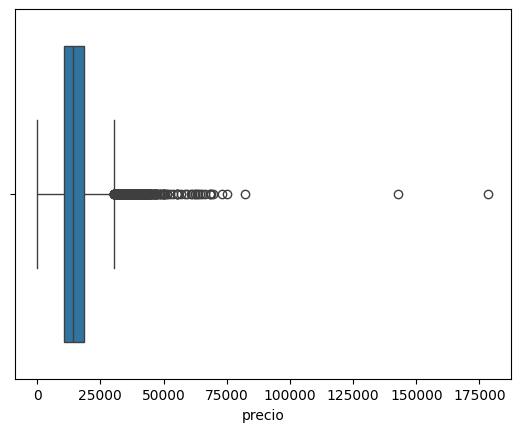

In [362]:
sns.boxplot(x=df["precio"])

In [363]:
# Outliers
df[df['precio']>125000]

,modelo,km,potencia,diesel,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_fecha_registro_venta,gama,trimestre_venta,mes_venta
4647,X4,103222,140,1,grey,suv,True,1,False,1,True,0,True,1,142800,1461,X Series,3,8
4716,X3,72515,135,1,blue,suv,False,0,True,1,False,0,False,1,178500,1979,X Series,3,8


In [364]:
df.drop(df[(df['precio']>125000)].index, inplace=True)

Analizamos la distribución de la variable precio con un boxplot y descubrimos que hay dos valores que son anormales. Procedemos a visualizar los registros con todas las variables e identificamos que son los modelos BMW X4 y X3.
Los precios para esos modelos nos resultan raros y hacemos una investigación en Google que nos confirman las sospechas. El X3 más caro vale 80.000€ y el X4 130.000 (preparación M Competition).
Ante esta situación, decidimos borrarlos para no falsear datos ya que supone menos del 1%.


## **Cambio tipo a booleano**

In [365]:
df.sample(5)

,modelo,km,potencia,diesel,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_fecha_registro_venta,gama,trimestre_venta,mes_venta
1959,114,150373,70,1,brown,hatchback,False,1,False,0,False,0,True,0,8200,1734,1 Series,1,3
2962,730,212200,190,1,blue,sedan,True,2,True,0,False,0,True,1,25700,2008,7 Series,2,4
1256,530,99012,190,1,grey,estate,False,1,True,0,True,1,True,1,29800,1461,5 Series,2,5
2297,116,116652,85,1,Desconocido,hatchback,False,1,False,0,False,0,True,0,9200,1976,1 Series,3,7
913,520,153102,140,1,Desconocido,estate,True,1,True,0,True,0,True,0,19800,-1,5 Series,2,4


In [366]:
df['volante_regulable'] = df['volante_regulable'].replace({True: 1, False: 0})
df['volante_regulable'] = df['volante_regulable'].astype(int)

df['camara_trasera'] = df['camara_trasera'].replace({True: 1, False: 0})
df['camara_trasera'] = df['camara_trasera'].astype(int)

df['elevalunas_electrico'] = df['elevalunas_electrico'].replace({True: 1, False: 0})
df['elevalunas_electrico'] = df['elevalunas_electrico'].astype(int)

df['gps'] = df['gps'].astype(int)

Convertimos el resto de variables booleanas a entero para que pueda trabajar el modelo.

## **Correlaciones**

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   modelo                       4799 non-null   object
 1   km                           4799 non-null   int64 
 2   potencia                     4799 non-null   int64 
 3   diesel                       4799 non-null   int64 
 4   color                        4799 non-null   object
 5   tipo_coche                   4799 non-null   object
 6   volante_regulable            4799 non-null   int64 
 7   aire_acondicionado           4799 non-null   int64 
 8   camara_trasera               4799 non-null   int64 
 9   asientos_traseros_plegables  4799 non-null   int64 
 10  elevalunas_electrico         4799 non-null   int64 
 11  bluetooth                    4799 non-null   int64 
 12  gps                          4799 non-null   int64 
 13  alerta_lim_velocidad         4799 non-

In [368]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,diesel,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_fecha_registro_venta,trimestre_venta,mes_venta
km,1.000000,-0.050541,0.037320,0.068003,0.018094,0.002548,-0.075421,0.045469,-0.036064,0.153379,-0.032542,-0.425694,0.185170,0.005441,0.000268
potencia,-0.050541,1.000000,-0.121339,0.326185,0.136203,0.316031,0.443819,0.341038,0.228178,0.006668,0.294783,0.681388,-0.025809,-0.020661,-0.029809
diesel,0.037320,-0.121339,1.000000,0.010867,0.056632,-0.014540,0.053609,-0.006250,-0.034924,0.047651,-0.000816,0.031783,-0.079807,0.017376,0.013166
volante_regulable,0.068003,0.326185,0.010867,1.000000,0.200325,0.254161,0.202468,0.277789,0.132980,0.242985,0.132379,0.284614,0.023837,0.072457,0.079887
aire_acondicionado,0.018094,0.136203,0.056632,0.200325,1.000000,0.123625,0.074314,0.181765,0.076125,0.248401,0.074131,0.168996,-0.026221,0.014686,0.018716
camara_trasera,0.002548,0.316031,-0.014540,0.254161,0.123625,1.000000,0.176953,0.199613,0.133604,0.062163,0.115049,0.264499,0.009609,0.020938,0.019691
asientos_traseros_plegables,-0.075421,0.443819,0.053609,0.202468,0.074314,0.176953,1.000000,0.155405,0.105947,0.021360,0.150473,0.457891,0.000942,0.068500,0.076960
elevalunas_electrico,0.045469,0.341038,-0.006250,0.277789,0.181765,0.199613,0.155405,1.000000,0.237706,0.201309,0.211146,0.281762,-0.036183,-0.015121,-0.024162
bluetooth,-0.036064,0.228178,-0.034924,0.132980,0.076125,0.133604,0.105947,0.237706,1.000000,0.116936,0.050018,0.218917,-0.019012,-0.017097,-0.013682
gps,0.153379,0.006668,0.047651,0.242985,0.248401,0.062163,0.021360,0.201309,0.116936,1.000000,-0.026114,0.010626,0.047598,0.059144,0.062264


Podemos observar como algunas variables tienen una alta correlación con respecto al target asi como la potencia, asientos_traseros_plegables, elevalunas_electrico o alerta_lim_velocidad.

Al observar una alta correlación entre el trimestre y el mes de la fecha de venta eliminamos la que menos información nos proporciona.

In [369]:
del (df['trimestre_venta'])

## **Lista de variables**

In [370]:
lista_numericas=[]
lista_booleanas=[]
lista_categoricas=[]

for i in df:
  if   (df[i].dtype.kind == "O"):
    lista_categoricas.append(i)
  elif (df[i].dtype.kind == "i") and len(df[i].unique())<= 3 and i != 'precio':
    lista_booleanas.append(i)
  elif (df[i].dtype.kind == "i") and i != 'precio':
    lista_numericas.append(i)

In [371]:
print(lista_categoricas)
print(lista_booleanas)
print(lista_numericas)

['modelo', 'color', 'tipo_coche', 'gama']
['diesel', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']
['km', 'potencia', 'dif_fecha_registro_venta', 'mes_venta']


## **Corr MinMaxScaler**

In [372]:
df_mms = df.copy()
lista_mms = lista_numericas + lista_booleanas
lista_mms.append('precio')
lista_mms

['km',
 'potencia',
 'dif_fecha_registro_venta',
 'mes_venta',
 'diesel',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad',
 'precio']

In [373]:
MinMax = MinMaxScaler()
df_mms[lista_mms] = MinMax.fit_transform(df_mms[lista_mms])

In [374]:
corr_mms = df_mms[lista_mms].corr()
corr_mms.style.background_gradient(cmap='coolwarm')

,km,potencia,dif_fecha_registro_venta,mes_venta,diesel,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
km,1.000000,-0.050541,0.185170,0.000268,0.037320,0.068003,0.018094,0.002548,-0.075421,0.045469,-0.036064,0.153379,-0.032542,-0.425694
potencia,-0.050541,1.000000,-0.025809,-0.029809,-0.121339,0.326185,0.136203,0.316031,0.443819,0.341038,0.228178,0.006668,0.294783,0.681388
dif_fecha_registro_venta,0.185170,-0.025809,1.000000,0.048208,-0.079807,0.023837,-0.026221,0.009609,0.000942,-0.036183,-0.019012,0.047598,-0.021667,-0.169207
mes_venta,0.000268,-0.029809,0.048208,1.000000,0.013166,0.079887,0.018716,0.019691,0.076960,-0.024162,-0.013682,0.062264,-0.017711,0.005608
diesel,0.037320,-0.121339,-0.079807,0.013166,1.000000,0.010867,0.056632,-0.014540,0.053609,-0.006250,-0.034924,0.047651,-0.000816,0.031783
volante_regulable,0.068003,0.326185,0.023837,0.079887,0.010867,1.000000,0.200325,0.254161,0.202468,0.277789,0.132980,0.242985,0.132379,0.284614
aire_acondicionado,0.018094,0.136203,-0.026221,0.018716,0.056632,0.200325,1.000000,0.123625,0.074314,0.181765,0.076125,0.248401,0.074131,0.168996
camara_trasera,0.002548,0.316031,0.009609,0.019691,-0.014540,0.254161,0.123625,1.000000,0.176953,0.199613,0.133604,0.062163,0.115049,0.264499
asientos_traseros_plegables,-0.075421,0.443819,0.000942,0.076960,0.053609,0.202468,0.074314,0.176953,1.000000,0.155405,0.105947,0.021360,0.150473,0.457891
elevalunas_electrico,0.045469,0.341038,-0.036183,-0.024162,-0.006250,0.277789,0.181765,0.199613,0.155405,1.000000,0.237706,0.201309,0.211146,0.281762


Después de realizar el MinMax Scaler observamos que no hay ninguna correlación importante entre los atributos.  La correlación más alta está entre potencia y dif_fecha_registro_venta (0.484560) pero no se acerca al valor 1 de máxima correlación. Tampoco encontramos ningún valor inversamente proporcional cercano a -1 por lo que esta correlación no nos aporta suficiente información como para poder eliminar alguna columna correlacionada.

## **Análisis variable vs target**

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

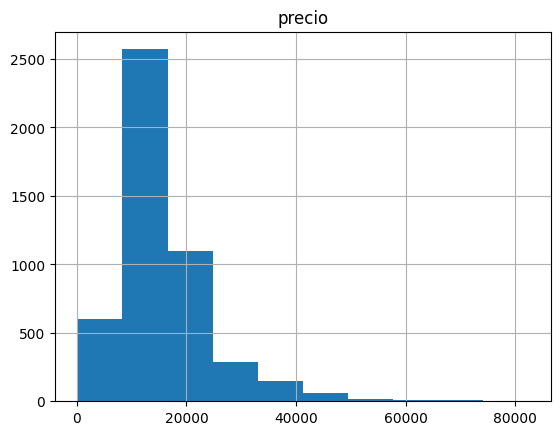

In [375]:
df.hist('precio')

<Axes: xlabel='precio'>

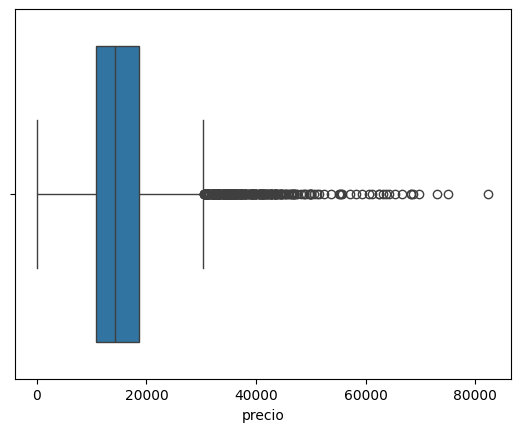

In [376]:
sns.boxplot(x=df['precio'])

In [377]:
# Creamos una nueva variable "log_precio" que será el logaritmo de "precio"
df["log_precio"] = np.log10(df["precio"])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

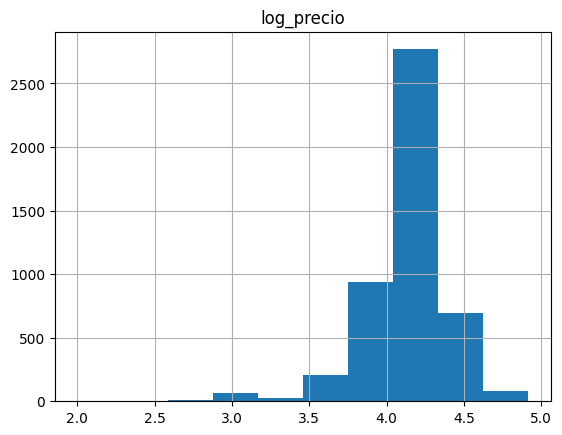

In [378]:
df.hist("log_precio")

<Axes: xlabel='log_precio'>

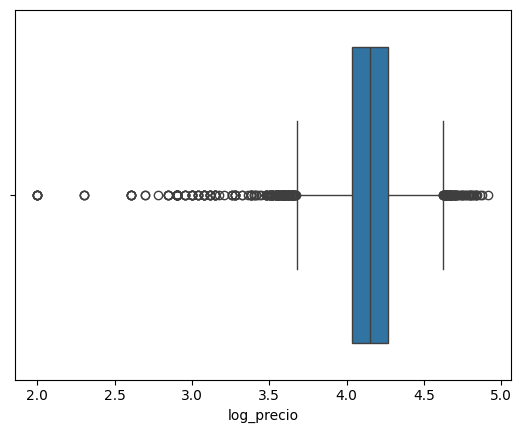

In [379]:
sns.boxplot(x=df["log_precio"])

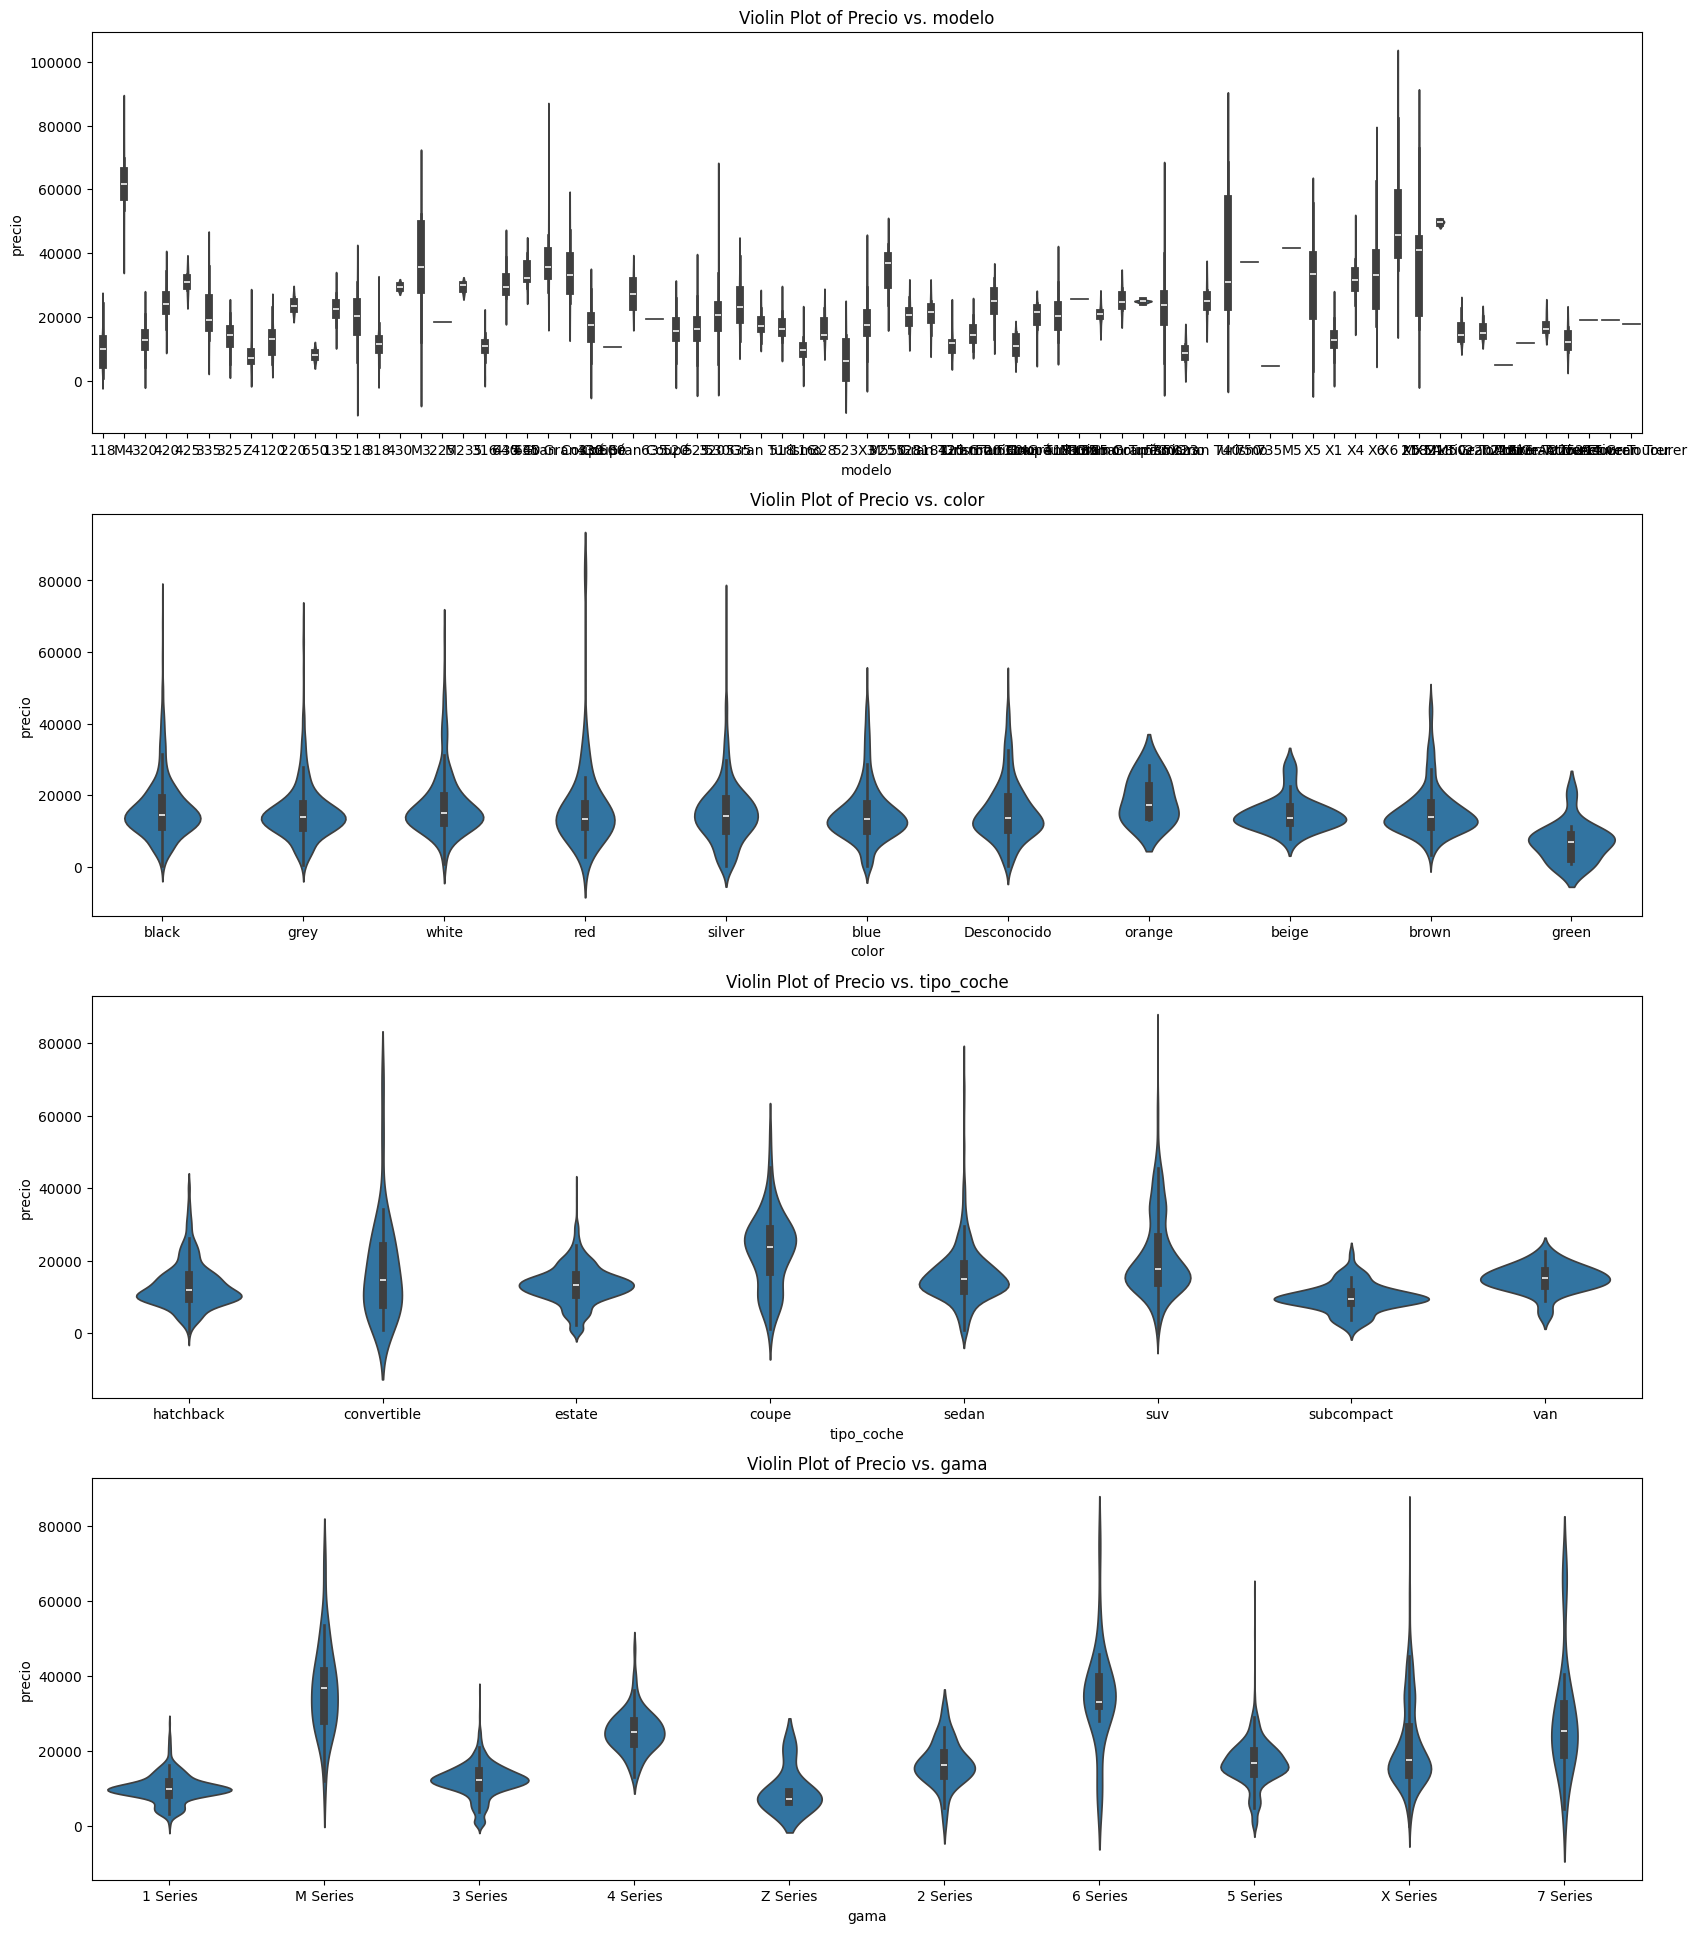

In [380]:
plt.figure(figsize=(20, 6 * len(lista_categoricas)))

for i, col in enumerate(lista_categoricas):
    plt.subplot(len(lista_categoricas), 1, i + 1)
    sns.violinplot(x=col, y="precio", data=df)
    plt.title(f"Violin Plot of Precio vs. {col}")

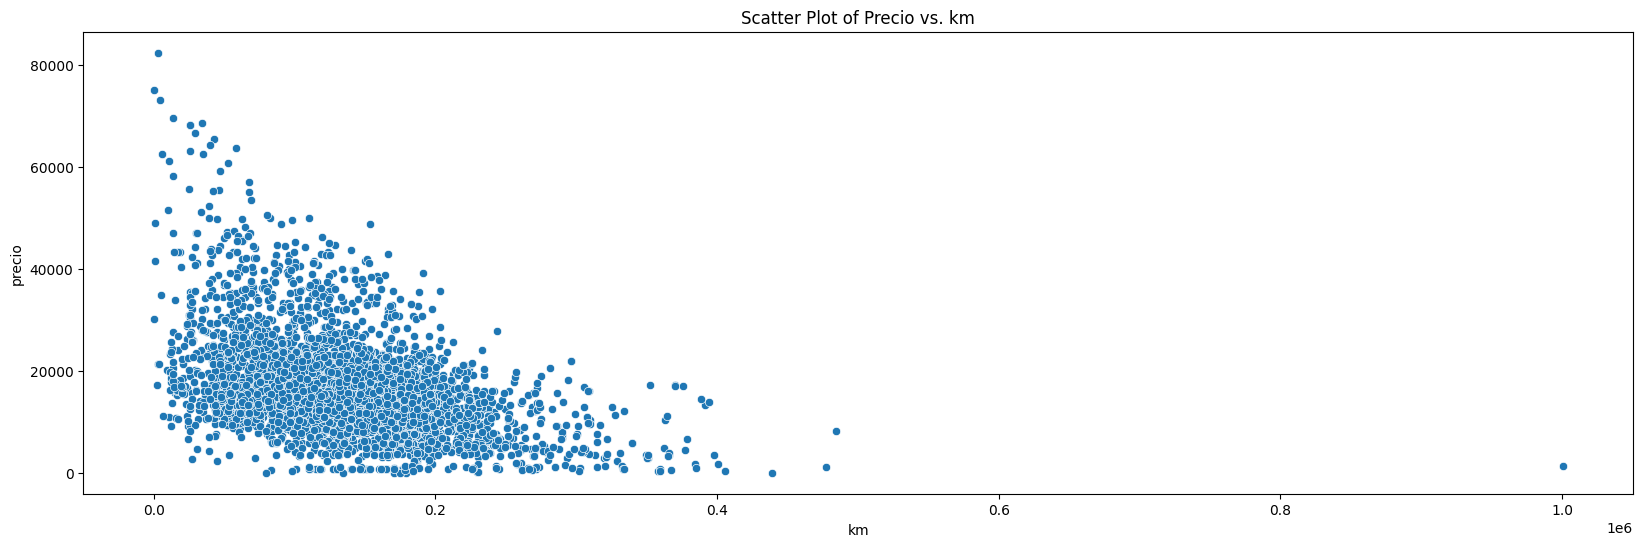

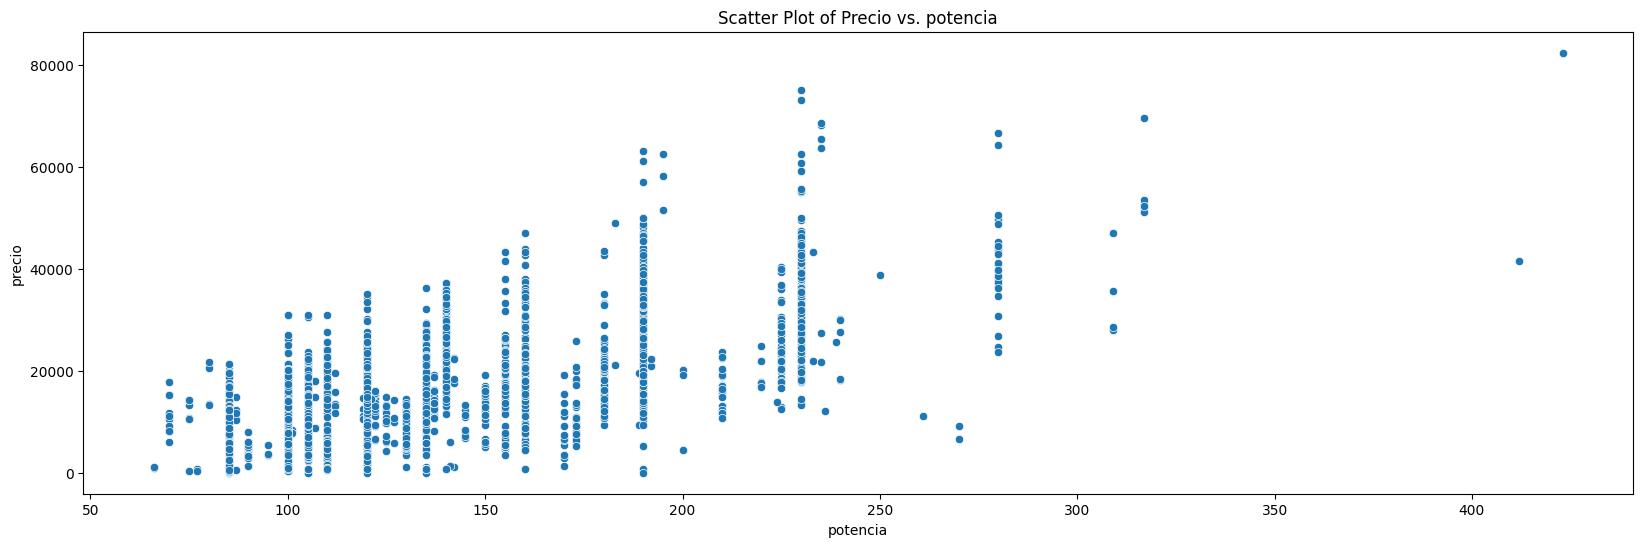

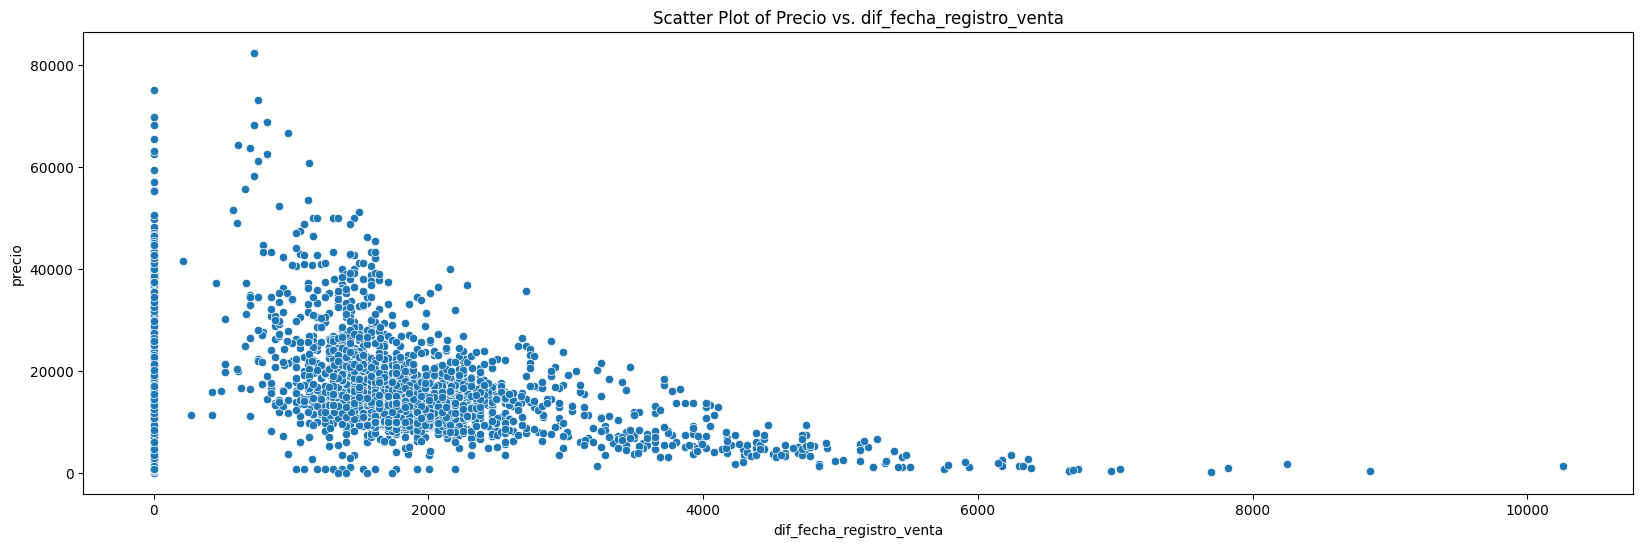

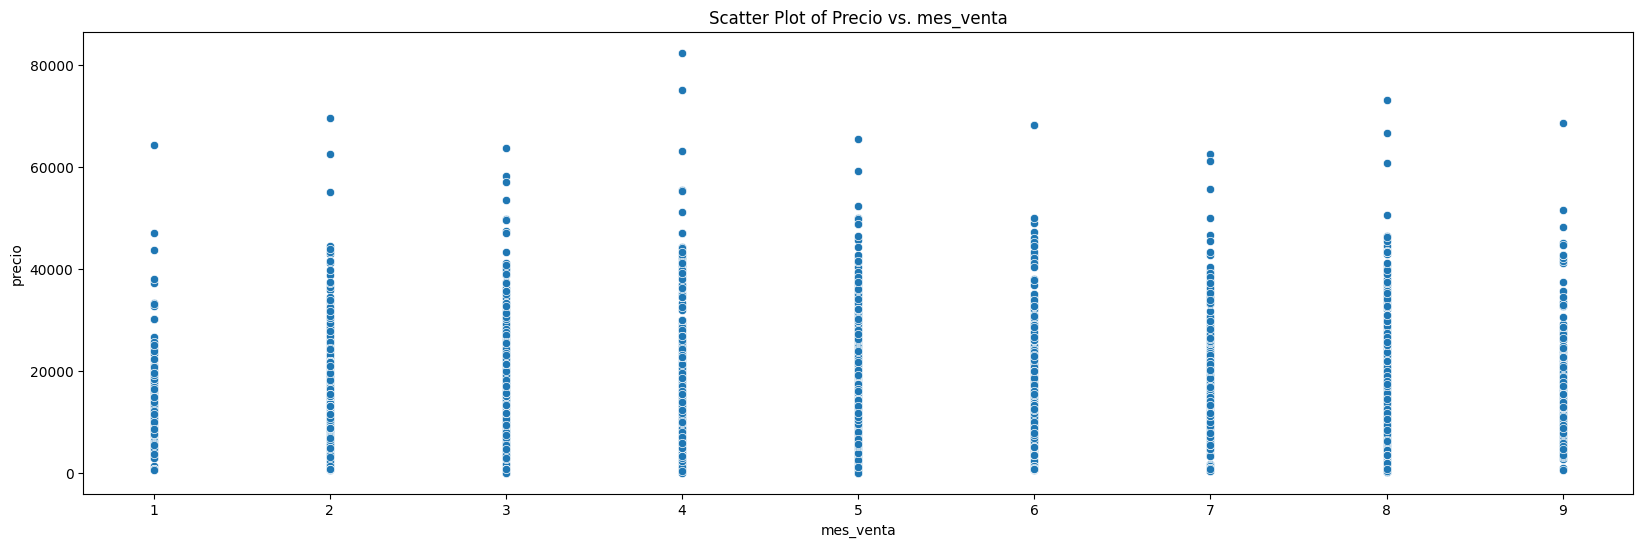

In [381]:
for i in lista_numericas:
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x=i, y="precio", data=df)
    plt.title(f"Scatter Plot of Precio vs. {i}")

Text(0.5, 1.0, 'Violin Plot of Precio vs. mes_venta')

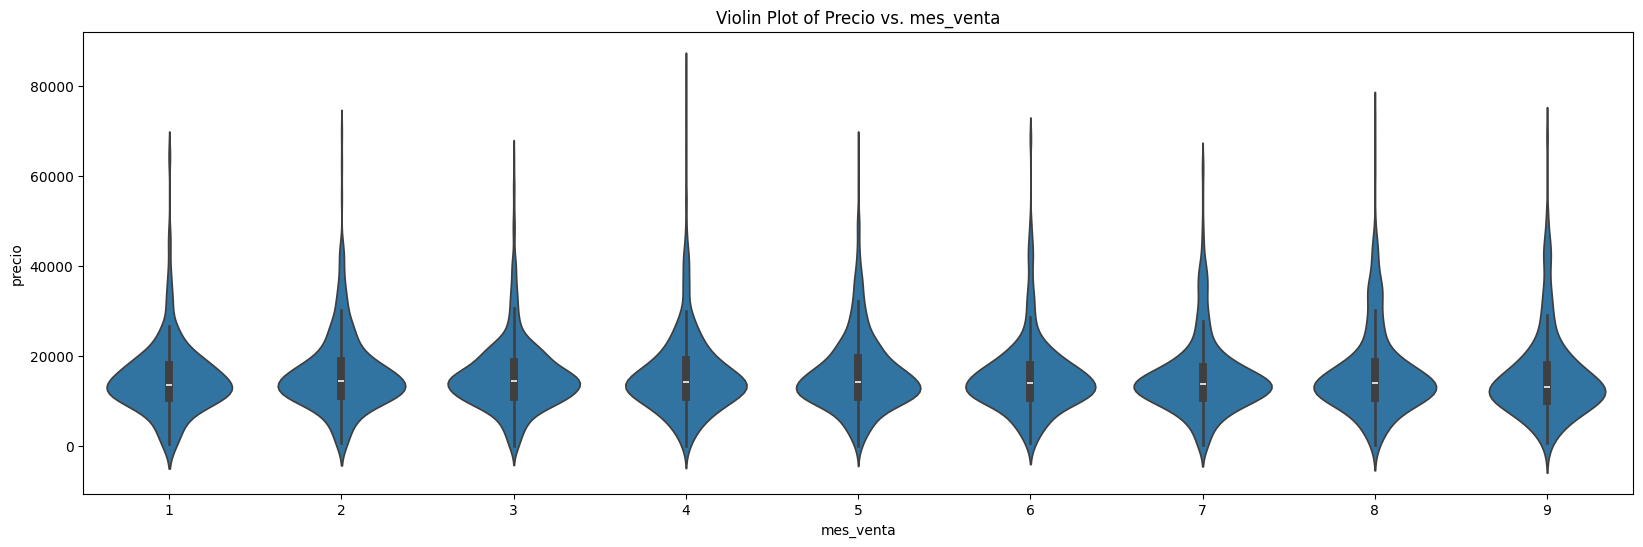

In [382]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='mes_venta', y="precio", data=df)
plt.title(f"Violin Plot of Precio vs. mes_venta")

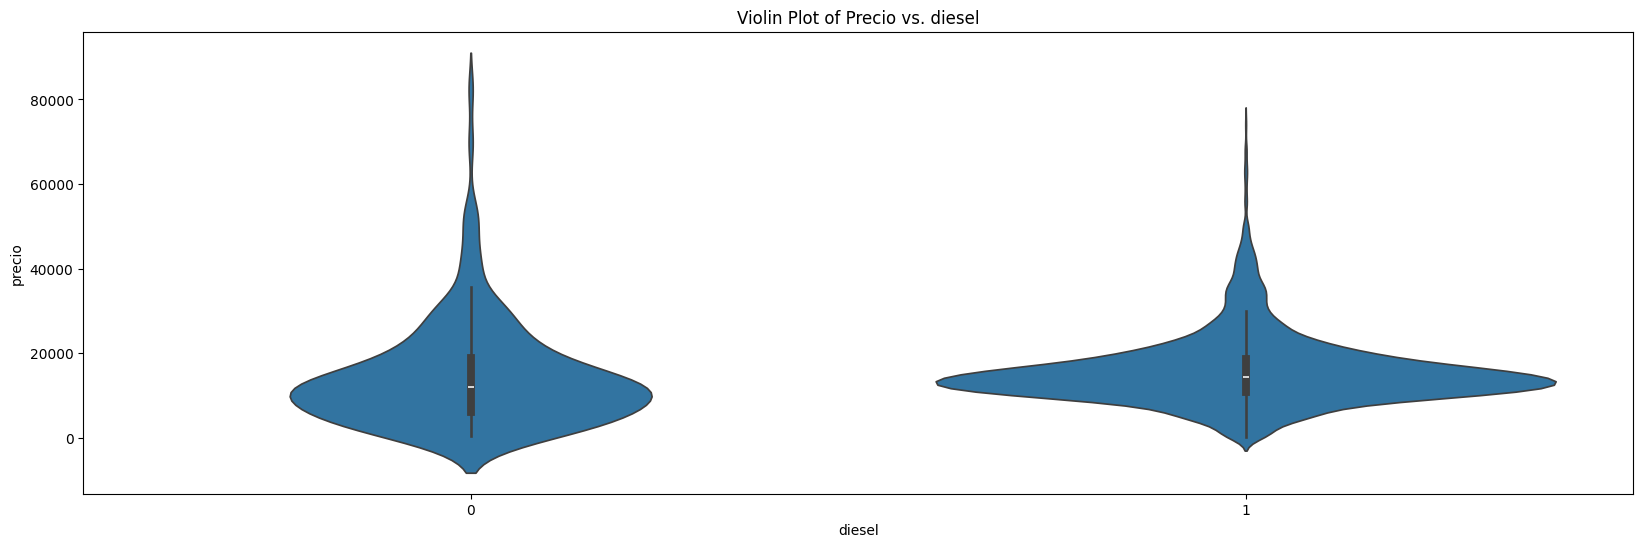

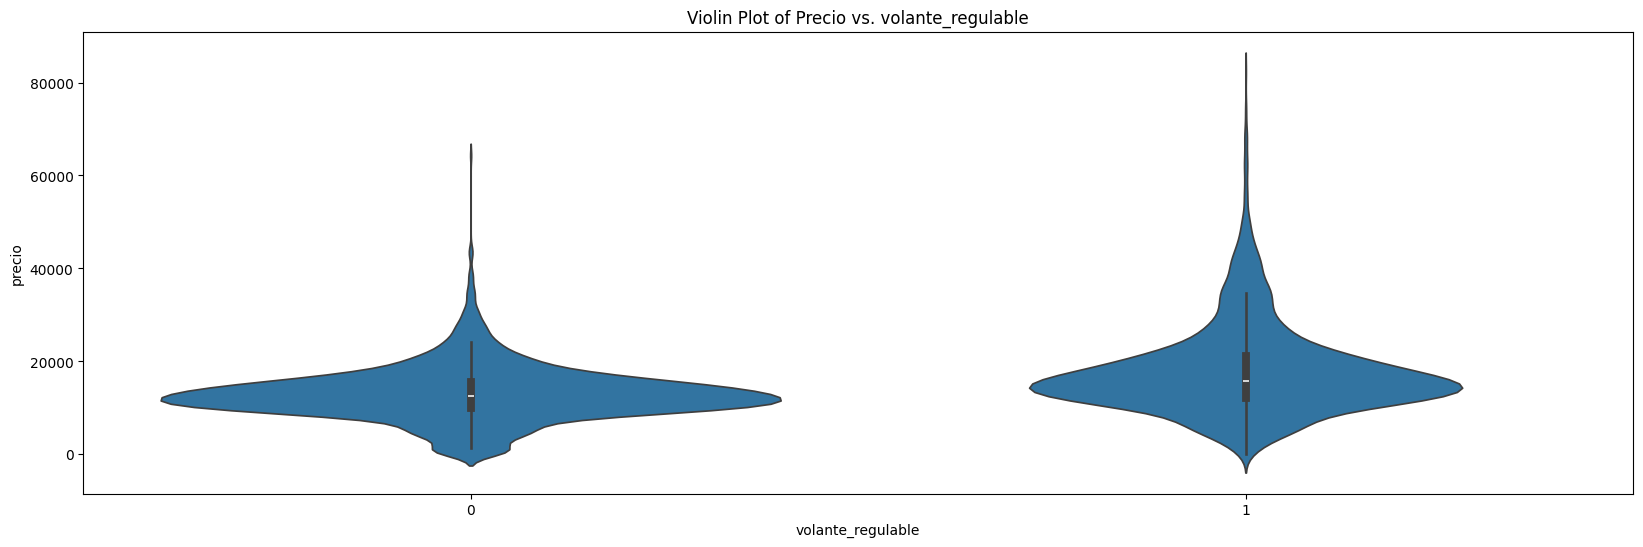

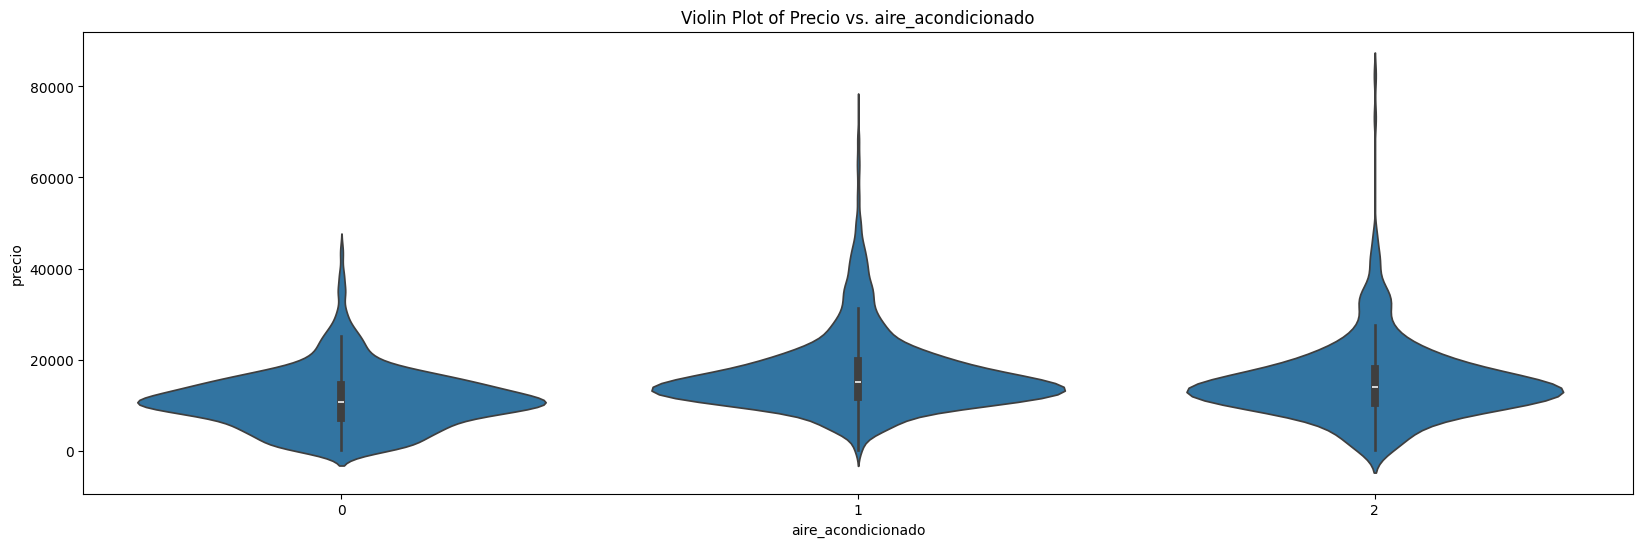

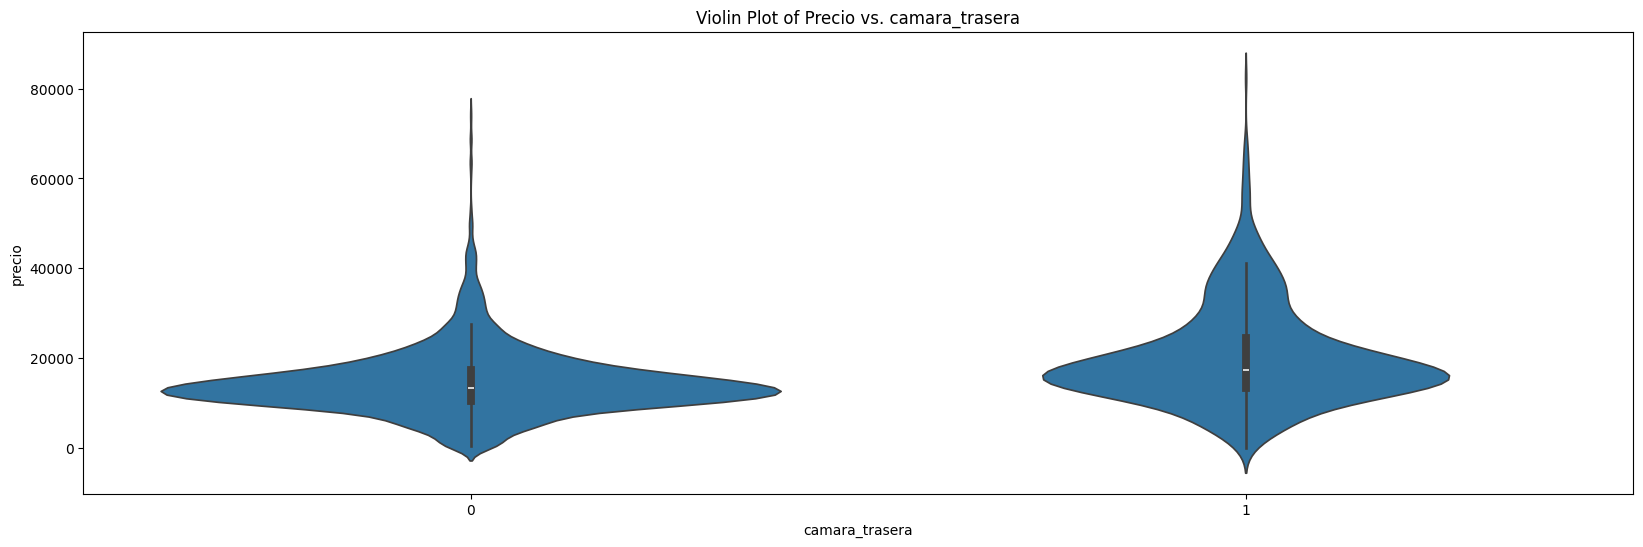

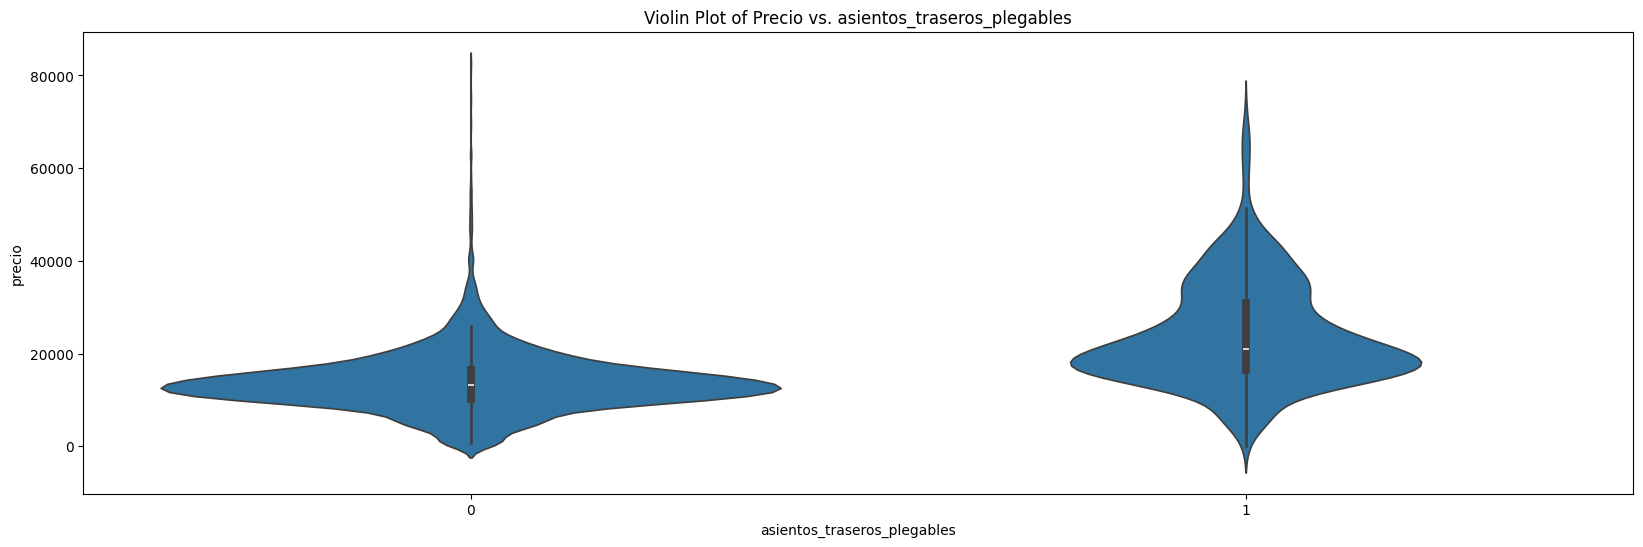

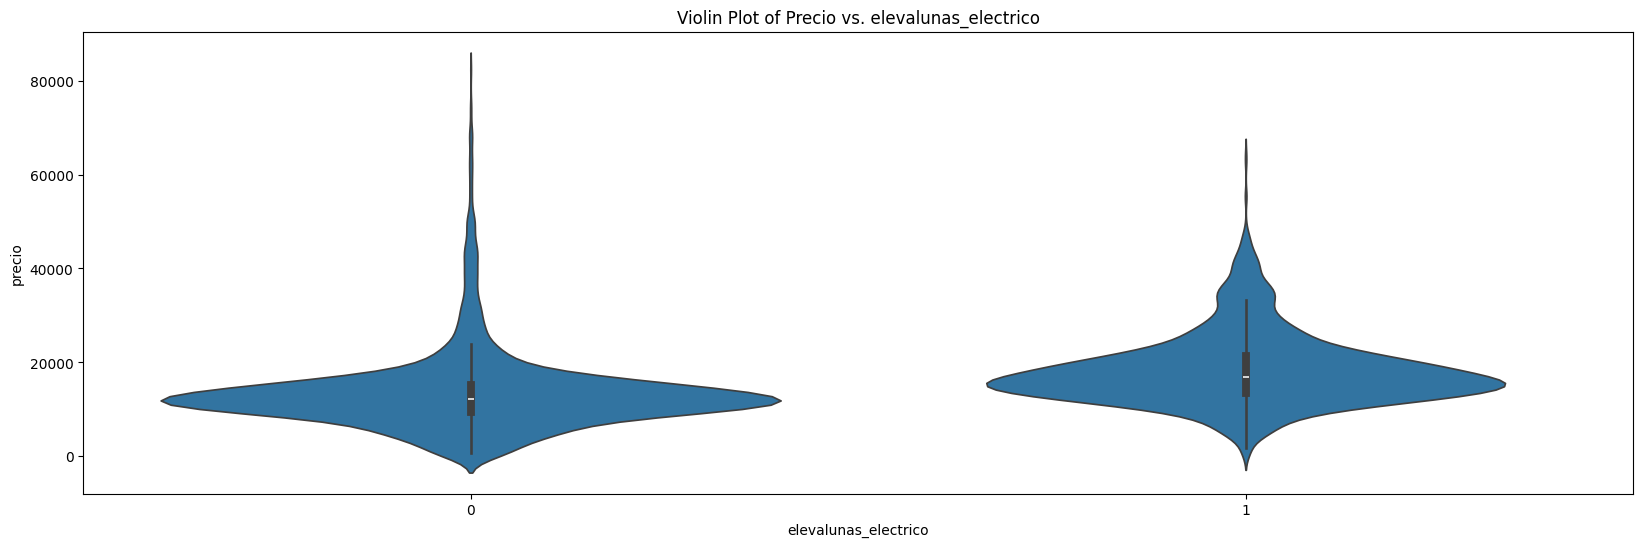

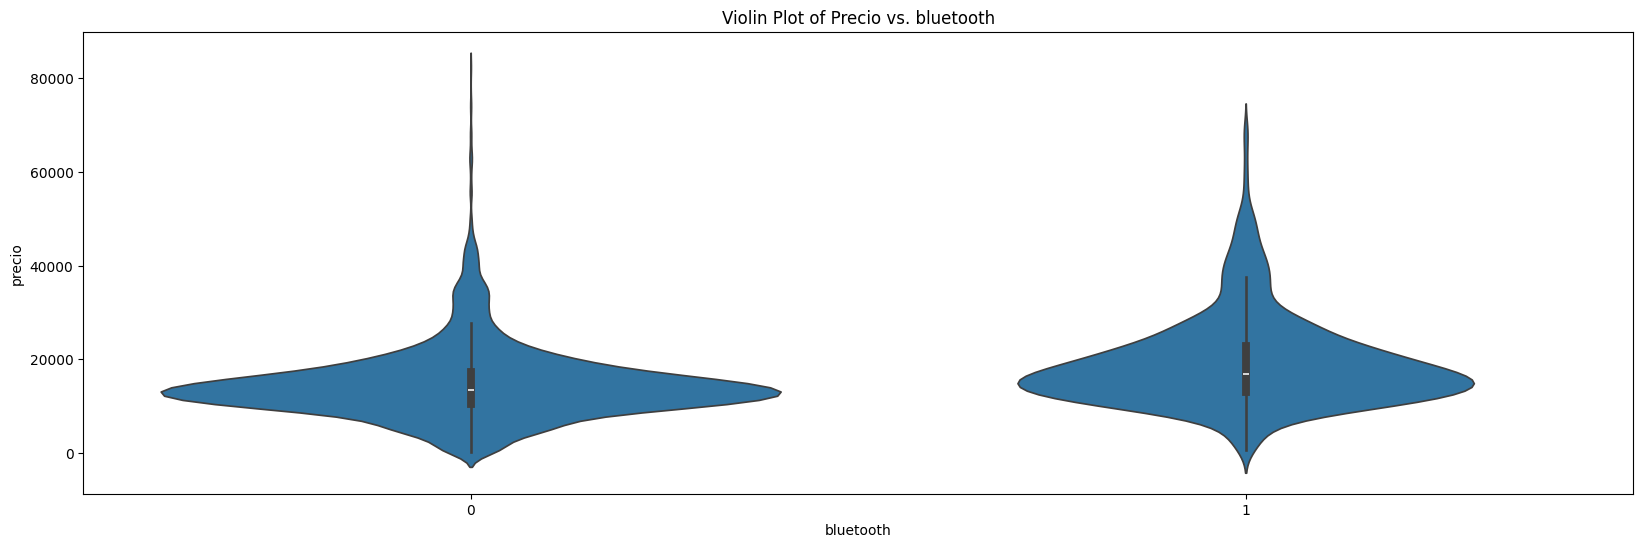

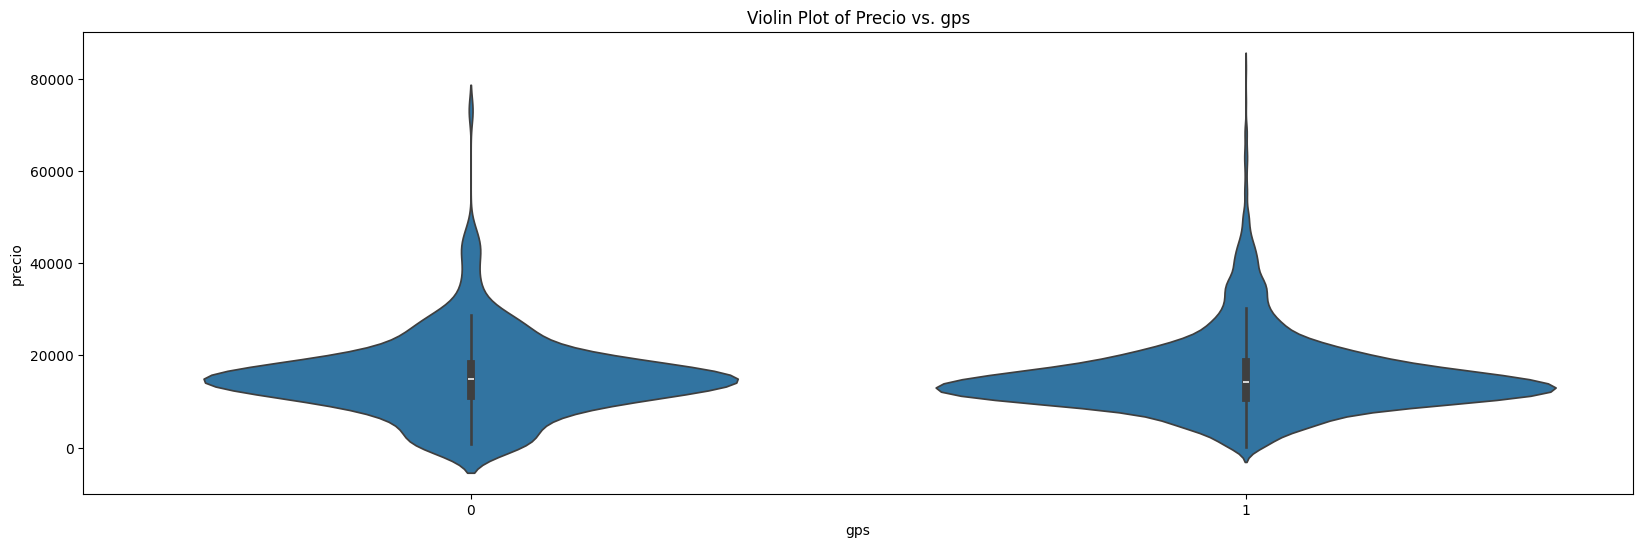

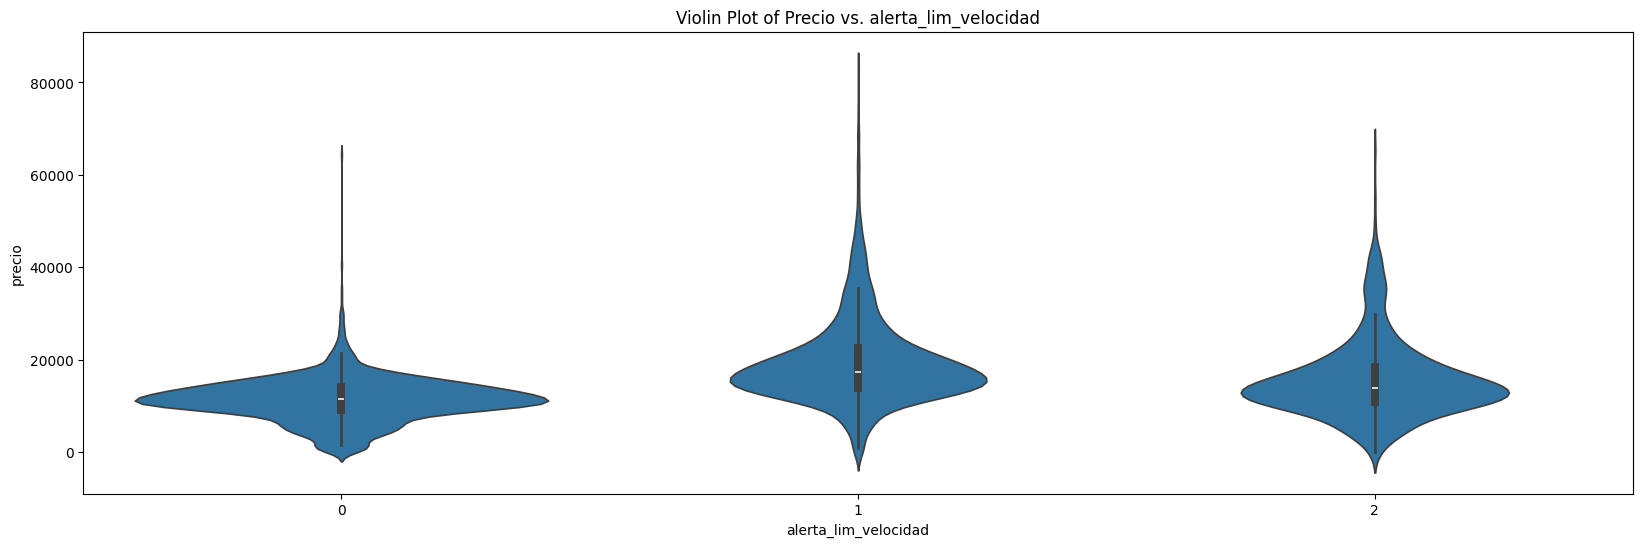

In [384]:
for i in lista_booleanas:
    plt.figure(figsize=(20, 6))
    sns.violinplot(x=i, y="precio", data=df)
    plt.title(f"Violin Plot of Precio vs. {i}")

## **One hot encoding**

Tras analizar las variables con el target, tanto el color como el tipo de coche tienen un impacto en el precio. Hemos decidido realizar one hot enconding con ambas variables para que el modelo pueda tenerlas en cuenta.

In [385]:
df_ohe = pd.get_dummies(data=df, columns=['color', 'tipo_coche', 'gama'], dtype=int)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4799 non-null   object 
 1   km                           4799 non-null   int64  
 2   potencia                     4799 non-null   int64  
 3   diesel                       4799 non-null   int64  
 4   volante_regulable            4799 non-null   int64  
 5   aire_acondicionado           4799 non-null   int64  
 6   camara_trasera               4799 non-null   int64  
 7   asientos_traseros_plegables  4799 non-null   int64  
 8   elevalunas_electrico         4799 non-null   int64  
 9   bluetooth                    4799 non-null   int64  
 10  gps                          4799 non-null   int64  
 11  alerta_lim_velocidad         4799 non-null   int64  
 12  precio                       4799 non-null   int64  
 13  dif_fecha_registro_vent

## **Correlación final**



In [386]:
corrf = df_ohe.corr(numeric_only=True)
corrf.style.background_gradient(cmap='coolwarm')

,km,potencia,diesel,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_fecha_registro_venta,mes_venta,log_precio,color_Desconocido,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,gama_1 Series,gama_2 Series,gama_3 Series,gama_4 Series,gama_5 Series,gama_6 Series,gama_7 Series,gama_M Series,gama_X Series,gama_Z Series
km,1.000000,-0.050541,0.037320,0.068003,0.018094,0.002548,-0.075421,0.045469,-0.036064,0.153379,-0.032542,-0.425694,0.185170,0.000268,-0.436064,0.010212,-0.009324,0.031142,-0.019632,-0.021502,0.041783,0.026602,-0.030773,-0.025735,0.025145,-0.067799,-0.059082,-0.069735,0.180194,-0.106921,0.063071,-0.030573,-0.112739,-0.094579,-0.112623,-0.126051,0.105132,-0.138568,0.168407,-0.038888,0.001634,-0.032627,-0.113750,-0.021452
potencia,-0.050541,1.000000,-0.121339,0.326185,0.136203,0.316031,0.443819,0.341038,0.228178,0.006668,0.294783,0.681388,-0.025809,-0.029809,0.510985,-0.007603,-0.020119,0.036039,-0.014350,-0.056798,-0.016617,0.004054,0.011562,-0.009191,0.013482,0.008198,0.028629,0.137468,-0.055216,-0.230762,0.031994,-0.134969,0.236598,-0.055913,-0.325061,-0.061792,-0.293965,0.055911,0.206534,0.207880,0.194000,0.301279,0.236530,0.000162
diesel,0.037320,-0.121339,1.000000,0.010867,0.056632,-0.014540,0.053609,-0.006250,-0.034924,0.047651,-0.000816,0.031783,-0.079807,0.013166,0.103017,-0.016250,0.005759,-0.002345,0.014021,0.035081,-0.068043,-0.004448,-0.022961,-0.012225,-0.002049,0.000087,-0.198287,-0.141491,0.061016,-0.015870,-0.040146,-0.007935,0.074459,-0.005864,-0.041712,-0.021734,0.002037,-0.029557,0.027844,-0.024424,-0.008598,-0.188267,0.074536,-0.173785
volante_regulable,0.068003,0.326185,0.010867,1.000000,0.200325,0.254161,0.202468,0.277789,0.132980,0.242985,0.132379,0.284614,0.023837,0.079887,0.249797,-0.026291,-0.025640,0.026047,0.010998,0.038724,0.010084,0.050227,0.008289,-0.033412,-0.015000,-0.100641,0.033533,0.039012,0.014439,-0.169294,0.048479,-0.091204,0.101948,-0.046807,-0.243035,-0.066480,-0.203991,0.047970,0.269972,0.071725,0.092501,0.043920,0.101357,0.031996
aire_acondicionado,0.018094,0.136203,0.056632,0.200325,1.000000,0.123625,0.074314,0.181765,0.076125,0.248401,0.074131,0.168996,-0.026221,0.018716,0.212814,-0.038178,0.014065,0.038953,-0.000298,0.021681,-0.028076,0.015435,0.016851,-0.036400,-0.019354,-0.035512,-0.030418,-0.023524,0.064042,-0.090277,0.044758,-0.083614,-0.003419,0.018723,-0.154691,0.020145,-0.024876,0.009604,0.128798,0.012656,0.054560,0.000989,-0.004294,-0.039174
camara_trasera,0.002548,0.316031,-0.014540,0.254161,0.123625,1.000000,0.176953,0.199613,0.133604,0.062163,0.115049,0.264499,0.009609,0.019691,0.199004,-0.032603,-0.020561,0.021432,-0.001670,-0.016522,0.011324,0.015994,-0.017785,-0.023625,0.001099,0.004479,-0.039049,0.023510,-0.042335,-0.051753,0.002043,-0.043525,0.111172,-0.021472,-0.104184,-0.020061,-0.153095,-0.001348,0.098389,0.091900,0.128532,0.033642,0.109627,-0.017785
asientos_traseros_plegables,-0.075421,0.443819,0.053609,0.202468,0.074314,0.176953,1.000000,0.155405,0.105947,0.021360,0.150473,0.457891,0.000942,0.076960,0.343025,-0.008032,-0.005462,0.021918,-0.034989,-0.011198,0.023737,-0.030735,-0.001783,0.012198,0.056100,0.014215,-0.042747,-0.051733,-0.293650,-0.173897,-0.135071,-0.061100,0.680026,-0.042747,-0.169446,-0.048597,-0.326740,-0.036598,-0.157615,-0.010788,0.050438,0.052178,0.680846,-0.016929
elevalunas_electrico,0.045469,0.341038,-0.006250,0.277789,0.181765,0.199613,0.155405,1.000000,0.237706,0.201309,0.211146,0.281762,-0.036183,-0.024162,0.321226,-0.012754,-0.024192,0.079254,-0.035816,-0.022072,-0.026786,-0.016845,0.014588,-0.024083,-0.032858,0.016159,-0.007184,0.100414,0.051819,-0.095961,0.006363,-0.098168,0.031738,-0.077929,-0.190462,-0.073166,-

Todos los modelos de BMW suv son de la gama X, por ello la correlación entre ambas variables es tan alta. Eliminamos gama_X Series que la hemos creado nosotros ya que da la misma información para el modelo.

In [387]:
suv = df_ohe[df_ohe['tipo_coche_suv'] == 1]
suv['modelo'].value_counts()

modelo
X3        435
X1        272
X5        229
X4         45
X6         43
X5 M       17
X6 M        8
X5 M50      3
520         1
Name: count, dtype: int64

Al hacer la matriz de correlación, vemos que tipo_coche_suv y gama_X, vemos que no hay una correlación directa de 1. Esto es un error ya que los únicos ‘suv’ que tiene BMW están en la gama X.
Por tanto, debemos hacer la corrección:
*   El modelo 520 que aparece como suv, lo borraremos
*   Los modelos X1 y X3, cuyo tipo_coche_suv no aparece como 1, los cambiaremos para que sí aparezcan con 1


In [388]:
suv[suv['modelo'] == '520']

,modelo,km,potencia,diesel,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,...,gama_1 Series,gama_2 Series,gama_3 Series,gama_4 Series,gama_5 Series,gama_6 Series,gama_7 Series,gama_M Series,gama_X Series,gama_Z Series
4528,520,169901,135,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [389]:
df_ohe.drop(4528, inplace=True)

In [390]:
serieX = df_ohe[df_ohe['gama_X Series'] == 1]
serieX['tipo_coche_suv'].value_counts()

tipo_coche_suv
1    1052
0       2
Name: count, dtype: int64

In [391]:
serieX[serieX['tipo_coche_suv']==0]

,modelo,km,potencia,diesel,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,...,gama_1 Series,gama_2 Series,gama_3 Series,gama_4 Series,gama_5 Series,gama_6 Series,gama_7 Series,gama_M Series,gama_X Series,gama_Z Series
797,X3,112349,130,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4774,X1,73193,135,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [392]:
df_ohe.loc[[797, 4774], 'tipo_coche_suv'] = 1
serieX = df_ohe[df_ohe['gama_X Series'] == 1]
serieX['tipo_coche_suv'].value_counts()

tipo_coche_suv
1    1054
Name: count, dtype: int64

Una vez solucionado los errores procedemos a eliminar la variable gama_X Series.

In [393]:
del(df_ohe['gama_X Series'])

## **Resultado final**

In [394]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4798 entries, 0 to 4802
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4798 non-null   object 
 1   km                           4798 non-null   int64  
 2   potencia                     4798 non-null   int64  
 3   diesel                       4798 non-null   int64  
 4   volante_regulable            4798 non-null   int64  
 5   aire_acondicionado           4798 non-null   int64  
 6   camara_trasera               4798 non-null   int64  
 7   asientos_traseros_plegables  4798 non-null   int64  
 8   elevalunas_electrico         4798 non-null   int64  
 9   bluetooth                    4798 non-null   int64  
 10  gps                          4798 non-null   int64  
 11  alerta_lim_velocidad         4798 non-null   int64  
 12  precio                       4798 non-null   int64  
 13  dif_fecha_registro_vent

## **Guardar ficheros**

In [395]:
df50 = df_ohe.head(50)
df50.to_excel("/content/drive/MyDrive/MASTER/TFM/Entregable 1/df_bmw_50.xlsx", index=False)

In [396]:
pd.to_pickle(df,"/content/drive/MyDrive/MASTER/TFM/Entregable 1/df_bmw_clean") # Guardamos el dataset en un pickle
pd.to_pickle(df_ohe,"/content/drive/MyDrive/MASTER/TFM/Entregable 1/df_bmw_clean_ohe")

In [397]:
df = pd.read_pickle("/content/drive/MyDrive/MASTER/TFM/Entregable 1/df_bmw_clean")